#Project Phase 1: Classification

Project: Involves an inital classification of pollutant releases to support the main focus regression analysis.

CMPT 3150 - Machine Learning 1

Team Members:
- Angela Lekivetz
- Alma Soria
- Crystal Blackburn
- Michaela Goud

#Introduction

This project focuses on analyzing the National Pollutant Release Inventory (NPRI) dataset to predict future trends in pollutant releases by industry. The main goal is to identify which industries are likely to have the highest increase and decrease in pollutant releases within the next 5 years.

To achieve this, the project involves:



1.   Data Transformation: Restructuring the NPRI data into a format suitable for time series analysis, including organizing it chronologically and addressing any data quality issues.
2.   Classification: Developing a preliminary classification model to categorize pollutant releases into broad classes, helping to understand patterns and trends in the data.
3.  Regression (implied): Although not explicitly mentioned in this phase, the overarching goal of predicting release trends implies the eventual use of regression models to forecast future release values.

The project emphasizes a thorough understanding of the data, careful data preparation, and clear explanations of the methods and findings. This initial classification task serves as a foundation for the subsequent regression analysis, which will ultimately address the main research question.

The NPRI is a Canadian resource for tracking industrial and commercial pollutant releases, promoting transparency and public awareness about environmental impacts.

# Project Context

## Chosen Problem
**Problem #5:**  
*“Based on NPRI data, which industry is predicted to have the highest growth of releases in 5 years? Which will have the largest decline?”*

## Importing Necessary Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import gdown #To download files, in this case from google drive



In [ ]:
# Set pandas display options for better visibility, global
pd.set_option('display.max_columns', None)  # Ensures that when you print a DataFrame, all columns are shown (even if there are many).
pd.set_option('display.expand_frame_repr', False) # Prevents pandas from breaking the DataFrame output across multiple lines.

## Load the NPRI dataset (Clean dataset)

In [ ]:

# Google Drive file ID (Extracted from google drive sharable link)
file_id_releases_preclean = "1jFBRuu0qozo-Nq8tHECu_9yS2y_e_LuR"
file_name_releases_preclean = "df_releases_preclean.csv"

# Download the file using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id_releases_preclean}", file_name_releases_preclean, quiet=False)

# Read the CSV file
df = pd.read_csv(file_name_releases_preclean)



Downloading...
From (original): https://drive.google.com/uc?id=1jFBRuu0qozo-Nq8tHECu_9yS2y_e_LuR
From (redirected): https://drive.google.com/uc?id=1jFBRuu0qozo-Nq8tHECu_9yS2y_e_LuR&confirm=t&uuid=bb80bc27-a200-462e-bdbe-c2397914df6d
To: /content/df_releases_preclean.csv
100%|██████████| 197M/197M [00:02<00:00, 87.4MB/s]


## Examine the data:

In [ ]:
df_release = df.copy()

In [ ]:
df_release.head(10)

Reporting_Year  NPRI_ID  Number of employees                           Company_Name Facility_Name   NAICS          NAICS_Title Province                 City   Latitude   Longitude  CAS_Number     Substance_Name   Units  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne)  NPRI_ID_Cat  NAICS_Cat Estimation_Method_Code  Total_Air_Releases  Total_Land_Releases  Total_Water_Releases  Total_All_Releases
0            2000        1                440.0  alberta pacific forest industries inc       Unknown  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867  10049-04-4   chlorine dioxide  tonnes                        0.0                               0.0                         0.0                      0.0                           5.200                                  0.0                       0.0                       0.0                        0.0                                          0.00                               0.0                                0.0                                  0.000            1     322112                      M               5.200                  0.0                  0.00               5.200
1            2000        1                440.0  alberta pacific forest industries inc       Unknown  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-56-1           methanol  tonnes                        0.0                               0.0                         0.0                      0.0                         113.000                                  0.0                       0.0                       0.0                        0.0                                          0.00                               0.0                                0.0                                  0.000            1     322112                      E             113.000                  0.0                  0.00             113.000
2            2000        1                440.0  alberta pacific forest industries inc       Unknown  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-66-3         chloroform  tonnes                        0.0                               0.0                         0.0                      0.0                           0.000                                  0.0                       0.0                       0.0                        0.0                                          0.00                               0.0                                0.0                                  0.000            1     322112                      M               0.000                  0.0                  0.00               0.000
3            2000        1                440.0  alberta pacific forest industries inc       Unknown  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     75-07-0       acetaldehyde  tonnes                        0.0                               0.0                         0.0                      0.0                           7.670                                  0.0                       0.0                       0.0                        0.0                                          0.00                               0.0                                0.0                                  0.000            1     322112                      E               7.670                  0.0                  0.00               7.670
4            2000        1                440.0  alberta pacific forest industries inc       Unknown  322112  chemical pulp mills       ab  county of athabasca  54

In [ ]:
df_release.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 34 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Reporting_Year                                737516 non-null  int64  
 1   NPRI_ID                                       737516 non-null  int64  
 2   Number of employees                           737516 non-null  float64
 3   Company_Name                                  737516 non-null  object 
 4   Facility_Name                                 736340 non-null  object 
 5   NAICS                                         737516 non-null  int64  
 6   NAICS_Title                                   737516 non-null  object 
 7   Province                                      737516 non-null  object 
 8   City                                          737516 non-null  object 
 9   Latitude                                      73

In [ ]:
df_release.describe()

Reporting_Year        NPRI_ID  Number of employees          NAICS       Latitude      Longitude  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne)    NPRI_ID_Cat      NAICS_Cat  Total_Air_Releases  Total_Land_Releases  Total_Water_Releases  Total_All_Releases
count   737516.000000  737516.000000        737516.000000  737516.000000  737516.000000  737516.000000              737516.000000                     737516.000000               737516.000000            737516.000000                   737516.000000                        737516.000000             737516.000000             737516.000000              737516.000000                                 737516.000000                     737516.000000                      737516.000000                          737516.000000  737516.000000  737516.000000       737516.000000        737516.000000         737516.000000       737516.000000
mean      2012.267601   11248.268386           276.447889  289175.551820      49.636706     -97.336905                  10.367992                          3.829248                    4.746724                 0.021693                      100.359815                             2.545150                  0.000440                  3.962627                   0.030854                                      5.701059                          0.000714                           0.730422                               0.097247   11248.268386  289175.551820          121.870621             3.993921              6.432195          132.296737
std          6.400156    9352.868266          1362.175714   94788.542197       5.149746      20.181792                 329.193552                        333.808062                  173.785236                 2.486890                     1682.190688                            72.269703                  0.091653                282.476340                   7.279564                                    156.478695                          0.170531                         345.372258                               0.710824    9352.868266   94788.542197         1778.667215           282.569704            379.186783         1840.206948
min       2000.000000       1.000000             0.000000  111120.000000       0.000000    -140.883600                   0.000000                          0.000000                    0.000000                 0.000000                        0.000000                             0.000000                  0.000000                  0.000000                   0.000000                                      0.000000                          0.000000                           0.000000                               0.000000       1.000000  111120.000000            0.000000             0.000000              0.000000            0.000000
25%       2007.000000    3775.000000             2.000000  211113.000000      45.429840    -114.750600                   0.000000                          0.000000                    0.000000                 0.000000                        0.000000                             0.000000                  0.000000                  0.000000                   0.000000                                      0.000000                          0.000000                           0.000000                               0.000000    3775.000000  211113.000000            0.063000             0.000000              0.000000            0.185500
50%       2012.000000    7114.000000            40.000000  312140.000000      49.791100    -104.614410                   0.000000                          0.000000                    0.000000                 0.00000

# **Phase 1: Classification**

## **Part 1: Feature Engineering**

Our machine learning objective is to predict highest growth of releases in 5 years? and the question of Which will have the largest decline?.



### Create Industry Sector column classification

The NPRI uses the latest (2017) NAICS codes to define industry sectors. From this classification numbers we will classify the NAICS titles we have in our datase.

We used the information in the corresponding website: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=1181553 to came up with our new Industry_Sector classification.

The function classify_industry takes a NAICS code as input (which can be numeric or a string) and returns the corresponding industry sector as a string. It checks if the NAICS code starts with one of several predefined prefixes and returns the matching industry sector. A special condition is included for the NAICS code prefix "322" to ensure codes starting with "322230" are skipped.

In [ ]:
def classify_industry(naics):
    code = str(naics)  # ensure the code is a string
    # Define mapping: each tuple of prefixes maps to an industry sector
    mapping = [
        (("3313",), "Aluminum"),
        (("327",), "Cement, lime and other non-metallic minerals"),
        (("325",), "Chemicals"),
        (("2211",), "Electricity"),
        (("331514", "331511"), "Iron and steel"),
        (("3314", "331529", "331523"), "Metals (except aluminum, and iron and steel)"),
        (("212",), "Mining and quarrying"),
        (("211110", "211113"), "Oil and gas extraction (excluding oil sands)"),
        (("221210", "412", "486"), "Oil and gas pipelines and storage"),
        (("211142", "211141", "211114"), "Oil sands"),
        (("324",), "Petroleum and coal product refining and manufacturing"),
        (("326",), "Plastics and rubber"),
        (("322",), "Pulp and paper"),  # will exclude "322230" below
        (("336", "415190"), "Transportation equipment manufacturing"),
        (("562",), "Waste treatment and disposal"),
        (("221320", "221310"), "Water and wastewater systems"),
        (("321",), "Wood products"),
        (("31", "32", "33"), "Other manufacturing")
    ]

    # Iterate through the mapping to find the first matching industry
    for prefixes, sector in mapping:
        if any(code.startswith(prefix) for prefix in prefixes):
            # For the "322" mapping, ensure we skip codes starting with "322230"
            if prefixes == ("322",) and code.startswith("322230"):
                continue
            return sector
    return "Other (except manufacturing)"

# Example usage: apply the classification to the 'NAICS' column of your DataFrame
df_release['Industry_Sector'] = df_release['NAICS'].apply(classify_industry)

print("\nNumber of rows per Industry Sector:")
print(df_release['Industry_Sector'].value_counts())



Number of rows per Industry Sector:
Industry_Sector
Oil and gas extraction (excluding oil sands)             227973
Other manufacturing                                       71576
Chemicals                                                 55505
Pulp and paper                                            44735
Mining and quarrying                                      44399
Other (except manufacturing)                              38291
Wood products                                             37453
Petroleum and coal product refining and manufacturing     29039
Oil and gas pipelines and storage                         28393
Electricity                                               28325
Transportation equipment manufacturing                    22551
Cement, lime and other non-metallic minerals              20953
Water and wastewater systems                              20277
Waste treatment and disposal                              15547
Oil sands                                          

In [ ]:
# We realized that creating new columns of total releases was wrong because we need to standarize units first, so we will drop them for now and create again later after units standarization
df_release.drop(columns=['Total_Air_Releases', 'Total_Land_Releases', 'Total_Water_Releases', 'Total_All_Releases'], inplace=True)



### Create kg columns - Standarized Units to Kg

To standarize our units which are currently g, kg, tonnes and g teq. We will take g, kg and tonnes which are mass units that can logically be converted into kg. We selected kg because since we have g and tonnes, it is kind of in the middle. g teq is a measurement of toxicity which cannot be converted and standarized to kg, it will be separated for our analysis.


In [ ]:
unit_conversion = {
    'g': 0.001,        # 1 g = 0.001 kg
    'kg': 1,           # already in kg
    'tonnes': 1000     # 1 tonne = 1000 kg
}

def get_conversion_factor(unit):
    unit_lower = unit.lower().strip()
    # If the unit includes 'teq', we treat it as a special case and return None (or handle it differently)
    if 'g teq' in unit_lower:
        return None
    # Otherwise, return the conversion factor from our dictionary
    return unit_conversion.get(unit_lower, None)

# Create the new column with conversion factors
df_release['conversion_factor'] = df_release['Units'].apply(get_conversion_factor)

In [ ]:
# List of columns to convert
columns_to_convert = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne)'
]

# Multiply each column by the 'conversion_factor' and create a new column for the converted values
for col in columns_to_convert:
    new_col_name = col + " (kg)"
    df_release[new_col_name] = df_release[col] * df_release['conversion_factor']

In [ ]:
#Verifying the g teq rows are ignored by the kg conversion

print("g TEQ")
df_release.loc[df['Units'] == 'g teq', [
    "Release to Air - Fugitive (kg)",
    "Release to Air - Other Non-Point (kg)",
    "Release to Air - Road dust (kg)",
    "Release to Air - Spills (kg)",
    "Release to Air - Stack / Point (kg)",
    "Release to Air - Storage / Handling (kg)",
    "Releases to Land - Leaks (kg)",
    "Releases to Land - Other (kg)",
    "Releases to Land - Spills (kg)",
    "Releases to Water Bodies - Direct Discharges (kg)",
    "Releases to Water Bodies - Leaks (kg)",
    "Releases to Water Bodies - Spills (kg)",
    "Sum of release to all media (<1tonne)"
]]

g TEQ


Release to Air - Fugitive (kg)  Release to Air - Other Non-Point (kg)  Release to Air - Road dust (kg)  Release to Air - Spills (kg)  Release to Air - Stack / Point (kg)  Release to Air - Storage / Handling (kg)  Releases to Land - Leaks (kg)  Releases to Land - Other (kg)  Releases to Land - Spills (kg)  Releases to Water Bodies - Direct Discharges (kg)  Releases to Water Bodies - Leaks (kg)  Releases to Water Bodies - Spills (kg)  Sum of release to all media (<1tonne)
224                                NaN                                    NaN                              NaN                           NaN                                  NaN                                       NaN                            NaN                            NaN                             NaN                                                NaN                                    NaN                                     NaN                               0.030000
244                                NaN                                    NaN                              NaN                           NaN                                  NaN                                       NaN                            NaN                            NaN                             NaN                                                NaN                                    NaN                                     NaN                               0.009000
292                                NaN                                    NaN                              NaN                           NaN                                  NaN                                       NaN                            NaN                            NaN                             NaN                                                NaN                                    NaN                                     NaN                               0.253000
302                                NaN                                    NaN                              NaN                           NaN                                  NaN                                       NaN                            NaN                            NaN                             NaN                                                NaN                                    NaN                                     NaN                               0.008000
318                                NaN                                    NaN                              NaN                           NaN                                  NaN                                       NaN                            NaN                            NaN                             NaN                                                NaN                                    NaN                                     NaN                               0.007000
...                                ...                                    ...                              ...                           ...                                  ...                                       ...                            ...                            ...                             ...                                                ...                                    ...                                     ...                                    ...
728204                             NaN                                    NaN                              NaN                           NaN                                  NaN                                       NaN                            NaN                            NaN                             NaN                                                NaN                                    NaN                                     NaN                               0.004650
729923                             NaN                                    NaN                              NaN                           NaN    

Handle g TEQ Separately:
The values reported in g TEQ (grams Toxic Equivalents) are already adjusted to reflect the relative toxicity of the substances (typically dioxins and furans). They represent a toxicity‐weighted measure rather than raw mass.

If our analysis focuses on raw mass releases, we should keep g TEQ values aside.


We are separating the df_release in 2 dataframes containing:
-  1.  'g teq' units in a dataframe named df_release_gteq.
-  2.   All the other units that are mass units will be in the dataframe named 'df_release_kg'.

In [ ]:
# DataFrame containing only rows where Units is 'g teq'
df_release_gteq = df_release[df_release['Units'] == 'g teq']

# DataFrame containing rows where Units are either 'g', 'kg', or 'tonnes'
df_release_kg = df_release[df_release['Units'].isin(['g', 'kg', 'tonnes'])]


In [ ]:
df_release_gteq.head()

Reporting_Year  NPRI_ID  Number of employees                         Company_Name                       Facility_Name   NAICS                            NAICS_Title Province                   City   Latitude   Longitude CAS_Number              Substance_Name  Units  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne)  NPRI_ID_Cat  NAICS_Cat Estimation_Method_Code               Industry_Sector  conversion_factor  Release to Air - Fugitive (kg)  Release to Air - Other Non-Point (kg)  Release to Air - Road dust (kg)  Release to Air - Spills (kg)  Release to Air - Stack / Point (kg)  Release to Air - Storage / Handling (kg)  Releases to Land - Leaks (kg)  Releases to Land - Other (kg)  Releases to Land - Spills (kg)  Releases to Water Bodies - Direct Discharges (kg)  Releases to Water Bodies - Leaks (kg)  Releases to Water Bodies - Spills (kg)  Sum of release to all media (<1tonne) (kg)
224            2000      211                 75.0         communaute urbaine de quebec               incinerateur regional  562210           waste treatment and disposal       qc                 quebec  46.828385  -71.220097   NA - D/F  dioxins and furans - total  g teq                        0.0                               0.0                         0.0                      0.0                           0.030                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.030          211     562210                      E  Waste treatment and disposal                NaN                             NaN                                    NaN                              NaN                           NaN                                  NaN                                       NaN                            NaN                            NaN                             NaN                                                NaN                                    NaN                                     NaN                                         NaN
244            2000      223                373.0      daishowa marubeni international           peace river pulp division  322112                    chemical pulp mills       ab  md of northern lights  56.372970 -117.184420   NA - D/F  dioxins and furans - total  g teq                        0.0                               0.0                         0.0                      0.0                           0.009                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.009          223     322112                      E                Pulp and paper                NaN                             NaN                                    NaN                              NaN                           NaN                                  NaN                                       NaN                            NaN                            NaN                             NaN                                                NaN                                    NaN                                     NaN                                         NaN
292            2000      267                117.0                   edmonton power inc  genesee thermal generating station  221112  fossil fuel electric power generation       ab                warburg  53.344000 

Cleaning the separated datasets with 'g teq' units

In [ ]:
# We will need only the original columns that still have the 'g teq' units. Dropping columns with only kg.
df_release_gteq.drop(columns=[
    "Release to Air - Fugitive (kg)",
    "Release to Air - Other Non-Point (kg)",
    "Release to Air - Road dust (kg)",
    "Release to Air - Spills (kg)",
    "Release to Air - Stack / Point (kg)",
    "Release to Air - Storage / Handling (kg)",
    "Releases to Land - Leaks (kg)",
    "Releases to Land - Other (kg)",
    "Releases to Land - Spills (kg)",
    "Releases to Water Bodies - Direct Discharges (kg)",
    "Releases to Water Bodies - Leaks (kg)",
    "Releases to Water Bodies - Spills (kg)",
    "Sum of release to all media (<1tonne) (kg)",'conversion_factor'], inplace=True)

<ipython-input-15-a8f37011ff0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release_gteq.drop(columns=[


Cleaning the separated datasets with 'g teq' units

In [ ]:
# We will need only the columns in kg (kilograms) units. Dropping original Units columns
df_release_kg.drop(columns=['Release to Air - Fugitive', 'Release to Air - Other Non-Point',
       'Release to Air - Road dust', 'Release to Air - Spills',
       'Release to Air - Stack / Point', 'Release to Air - Storage / Handling',
       'Releases to Land - Leaks', 'Releases to Land - Other',
       'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Sum of release to all media (<1tonne)', 'Units', 'conversion_factor'], inplace=True)

<ipython-input-16-5b827972f773>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release_kg.drop(columns=['Release to Air - Fugitive', 'Release to Air - Other Non-Point',


In [ ]:
df_release_kg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729141 entries, 0 to 737515
Data columns (total 30 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Reporting_Year                                     729141 non-null  int64  
 1   NPRI_ID                                            729141 non-null  int64  
 2   Number of employees                                729141 non-null  float64
 3   Company_Name                                       729141 non-null  object 
 4   Facility_Name                                      728009 non-null  object 
 5   NAICS                                              729141 non-null  int64  
 6   NAICS_Title                                        729141 non-null  object 
 7   Province                                           729141 non-null  object 
 8   City                                               729141 non-null  object 
 9 

## Working only with df_release_kg

In [ ]:
# We will create a new csv containing this new dataframe to only work with kg units

df_release_kg.to_csv('df_release_kg.csv', index=False)

For now we wil only work on the dataframe 'df_release_kg'.

In [ ]:
#Since we are using a cleaned csv from our data cleaninig process let's update the following columns' datatypes

for col in ['Company_Name', 'Facility_Name', 'NAICS_Title',
            'Substance_Name', 'Province', 'City',
             'Estimation_Method_Code', 'Industry_Sector']:
    df_release_kg[col] = df_release[col].astype('category')


<ipython-input-19-b2e6e7503e78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release_kg[col] = df_release[col].astype('category')
<ipython-input-19-b2e6e7503e78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release_kg[col] = df_release[col].astype('category')
<ipython-input-19-b2e6e7503e78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
df_release_kg.dtypes

Reporting_Year                                          int64
NPRI_ID                                                 int64
Number of employees                                   float64
Company_Name                                         category
Facility_Name                                        category
NAICS                                                   int64
NAICS_Title                                          category
Province                                             category
City                                                 category
Latitude                                              float64
Longitude                                             float64
CAS_Number                                             object
Substance_Name                                       category
NPRI_ID_Cat                                             int64
NAICS_Cat                                               int64
Estimation_Method_Code                               category
Industry_Sector                                      category
Release to Air - Fugitive (kg)                        float64
Release to Air - Other Non-Point (kg)                 float64
Release to Air - Road dust (kg)                       float64
Release to Air - Spills (kg)                          float64
Release to Air - Stack / Point (kg)                   float64
Release to Air - Storage / Handling (kg)              float64
Releases to Land - Leaks (kg)                         float64
Releases to Land - Other (kg)                         float64
Releases to Land - Spills (kg)                        float64
Releases to Water Bodies - Direct Discharges (kg)     float64
Releases to Water Bodies - Leaks (kg)                 float64
Releases to Water Bodies - Spills (kg)                float64
Sum of release to all media (<1tonne) (kg)            float64
dtype: object

### How This Setup Aids Our Classification Problem

The overall goal is to predict, based on historical NPRI data, which industry is likely to see the highest growth and which will see the largest decline in releases over the next 5 years. Here's why this approach is well-suited:

#### Feature Engineering
- **Aggregated columns** (Total_All_Releases, Total_Air_Releases, etc.) provide concise, interpretable features.
- This simplifies the modeling process by reducing the number of variables while preserving the essential trends.

#### Temporal Structuring
- Filtering for a recent, fixed period (2017–2022) ensures that the model learns from relevant, up-to-date trends.
- Pivoting by year creates a time-series-like structure that can be used to compute growth rates.

#### Granularity and Flexibility
- By including both the original release types and the aggregated totals, we can later decide which level of detail is most predictive.
- We could build models on overall trends (Total_All_Releases) or investigate which specific media (Air, Land, Water) are driving changes.

#### Data Consistency
- Reshaping the DataFrame and handling missing values ensures that each industry’s time-series is complete.
- A complete time-series is critical for accurately estimating trends and growth rates.

Ultimately, this preparation transforms NPRI data into a structured format that highlights the temporal evolution of pollutant releases. Such a structure is not only easier to visualize (e.g., through trend plots) but also provides a solid foundation for building a machine learning or statistical forecasting model to classify industries by their expected growth or decline in releases over the next 5 years.

See the code below


### Create Columns for Years

In [ ]:
# Define the original release columns in your DataFrame
release_cols = [
    'Release to Air - Fugitive (kg)',
    'Release to Air - Other Non-Point (kg)',
    'Release to Air - Road dust (kg)',
    'Release to Air - Spills (kg)',
    'Release to Air - Stack / Point (kg)',
    'Release to Air - Storage / Handling (kg)',
    'Releases to Land - Leaks (kg)',
    'Releases to Land - Other (kg)',
    'Releases to Land - Spills (kg)',
    'Releases to Water Bodies - Direct Discharges (kg)',
    'Releases to Water Bodies - Leaks (kg)',
    'Releases to Water Bodies - Spills (kg)',
    'Sum of release to all media (<1tonne) (kg)'
]

# Create new aggregate columns on df_release_kg
df_release_kg['Total_Air_Releases'] = df_release_kg[[col for col in release_cols if 'Air' in col]].sum(axis=1)
df_release_kg['Total_Land_Releases'] = df_release_kg[[col for col in release_cols if 'Land' in col]].sum(axis=1)
df_release_kg['Total_Water_Releases'] = df_release_kg[[col for col in release_cols if 'Water' in col]].sum(axis=1)
df_release_kg['Total_All_Releases'] = df_release_kg[release_cols].sum(axis=1)

# Combine original release columns with the new total columns for pivoting
all_release_cols = release_cols + [
    'Total_Air_Releases',
    'Total_Land_Releases',
    'Total_Water_Releases',
    'Total_All_Releases'
]

# Filter the DataFrame for the years of interest (2017-2022)
df_filtered = df_release_kg[
    (df_release_kg['Reporting_Year'] >= 2017) &
    (df_release_kg['Reporting_Year'] <= 2022)
].copy()

# Reshape the DataFrame from wide to long format: one row per Industry_Sector, Reporting_Year, and Release_Type
df_melt = pd.melt(
    df_filtered,
    id_vars=['Industry_Sector', 'Reporting_Year'],
    value_vars=all_release_cols,
    var_name='Release_Type',
    value_name='Release_Value'
)

# Pivot the melted DataFrame so that each combination of Industry_Sector and Release_Type gets columns for each year
df_pivot_all = df_melt.pivot_table(
    index=['Industry_Sector', 'Release_Type'],
    columns='Reporting_Year',
    values='Release_Value',
    aggfunc='sum'
).reset_index()

# Remove any pivot table column name and fill missing numeric values with 0
df_pivot_all.columns.name = None
numeric_cols = df_pivot_all.select_dtypes(include=['number']).columns
df_pivot_all[numeric_cols] = df_pivot_all[numeric_cols].fillna(0)

print(df_pivot_all)


<ipython-input-21-a03e45158907>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release_kg['Total_Air_Releases'] = df_release_kg[[col for col in release_cols if 'Air' in col]].sum(axis=1)
<ipython-input-21-a03e45158907>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release_kg['Total_Land_Releases'] = df_release_kg[[col for col in release_cols if 'Land' in col]].sum(axis=1)
<ipython-input-21-a03e45158907>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

    Industry_Sector                                Release_Type          2017          2018          2019          2020          2021          2022
0          Aluminum              Release to Air - Fugitive (kg)  2.298527e+07  2.169851e+07  2.156382e+07  2.292812e+07  2.295173e+07  2.338215e+07
1          Aluminum       Release to Air - Other Non-Point (kg)  8.231240e+04  8.562500e+04  8.523900e+04  7.277100e+04  1.544272e+05  2.770000e-02
2          Aluminum             Release to Air - Road dust (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
3          Aluminum                Release to Air - Spills (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  6.743590e+05
4          Aluminum         Release to Air - Stack / Point (kg)  4.980255e+08  4.406085e+08  4.165760e+08  4.484155e+08  4.389460e+08  4.242873e+08
..              ...                                         ...           ...           ...           ...       

In [ ]:
df_pivot_all.head(50)

Industry_Sector                                       Release_Type          2017          2018          2019          2020          2021          2022
0                                       Aluminum                     Release to Air - Fugitive (kg)  2.298527e+07  2.169851e+07  2.156382e+07  2.292812e+07  2.295173e+07  2.338215e+07
1                                       Aluminum              Release to Air - Other Non-Point (kg)  8.231240e+04  8.562500e+04  8.523900e+04  7.277100e+04  1.544272e+05  2.770000e-02
2                                       Aluminum                    Release to Air - Road dust (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
3                                       Aluminum                       Release to Air - Spills (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  6.743590e+05
4                                       Aluminum                Release to Air - Stack / Point (kg)  4.980255e+08  4.406085e+08  4.165760e+08  4.484155e+08  4.389460e+08  4.242873e+08
5                                       Aluminum           Release to Air - Storage / Handling (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.049960e+02  2.195000e+03
6                                       Aluminum                      Releases to Land - Leaks (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
7                                       Aluminum                      Releases to Land - Other (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
8                                       Aluminum                     Releases to Land - Spills (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
9                                       Aluminum  Releases to Water Bodies - Direct Discharges (kg)  1.474010e+01  6.326900e+00  5.667000e+00  5.699340e+00  5.488300e+00  4.438102e+00
10                                      Aluminum              Releases to Water Bodies - Leaks (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
11                                      Aluminum             Releases to Water Bodies - Spills (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
12                                      Aluminum         Sum of release to all media (<1tonne) (kg)  1.052321e+04  9.377246e+03  7.896546e+03  8.533466e+03  9.891183e+03  7.774868e+03
13                                      Aluminum                                 Total_Air_Releases  5.210931e+08  4.623926e+08  4.382251e+08  4.714164e+08  4.620523e+08  4.483460e+08
14                                      Aluminum                                 Total_All_Releases  5.211036e+08  4.624020e+08  4.382330e+08  4.714249e+08  4.620622e+08  4.483538e+08
15                                      Aluminum                                Total_Land_Releases  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
16                                      Aluminum                               Total_Water_Releases  1.474010e+01  6.326900e+00  5.667000e+00  5.699340e+00  5.488300e+00  4.438102e+00
17  Cement, lime and other non-metallic minerals                     Release to Air - Fugitive (kg)  1.508580e+06  1.571474e+06  1.865726e+06  1.978705e+06  1.874162e+06  1.830431e+06
18  Cement, lime and other non-metallic minerals              Release to Air - Other Non-Point (kg)  6.653106e+05  7.488152e+05  6.762796e+05  6.047736e+05  5.982502e+05  2.364360e+05
19  Cement, lime and other non-metallic minerals                    Release to Air - Road dust (kg)  2.186017e+06  1.385462e+06  1.292325e+06  1.478456e+06  1.171653e+06  1.189132e+06
20  Cement, lime and other non-metallic minerals                       Release to Air - Spills (kg)  1.935305e+05  1.755477e+05  1.747765e+05  2.055288e+05  2.340628e+05

### For Feature Eng. Support

Visualizations like the ones below provide a clear picture of the temporal behavior of pollutant releases by industry. They help identify natural clusters, gaps, and trends in the data, all of which are invaluable when deciding on threshold values for binning. These bins, in turn, transform the continuous release values into discrete classes that are easier to use for classification—ultimately allowing us to predict which industries might experience significant growth or decline in their releases over the next 5 years.

Creating a csv df_pivot_all for our records and good practices

In [ ]:
df_pivot_all.to_csv('df_pivot_all.csv', index=False)

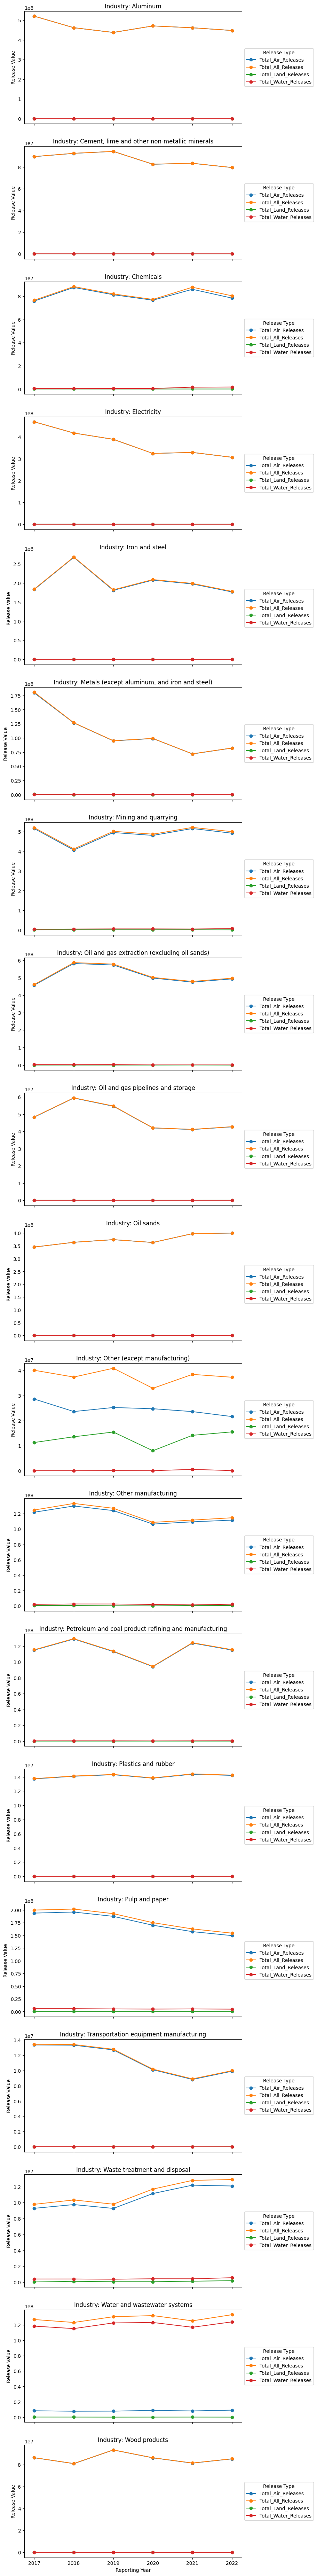

In [ ]:
import matplotlib.pyplot as plt

# List of years
years = [2017, 2018, 2019, 2020, 2021, 2022]

# Filter the DataFrame to only include the four total release types
total_release_types = [
    'Total_All_Releases',
    'Total_Air_Releases',
    'Total_Land_Releases',
    'Total_Water_Releases'
]
df_totals = df_pivot_all[df_pivot_all['Release_Type'].isin(total_release_types)]

# Get unique industry sectors from the filtered DataFrame
industries = df_totals['Industry_Sector'].unique()

# Create a subplot for each industry
n_industries = len(industries)
fig, axs = plt.subplots(n_industries, 1, figsize=(10, 5 * n_industries), sharex=True)

# Ensure axs is iterable even if there's only one subplot
if n_industries == 1:
    axs = [axs]

for ax, industry in zip(axs, industries):
    # Subset the data for this industry
    subset = df_totals[df_totals['Industry_Sector'] == industry]

    # Plot each total release type
    for _, row in subset.iterrows():
        release_type = row['Release_Type']
        # Get release values for each year
        release_values = [row.get(year, 0) for year in years]
        ax.plot(years, release_values, marker='o', label=release_type)

    ax.set_title(f'Industry: {industry}')
    ax.set_ylabel('Release Value')

    # Place the legend on the right side
    ax.legend(
        title='Release Type',
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

axs[-1].set_xlabel('Reporting Year')

# Adjust the subplot so the legend is not clipped
plt.subplots_adjust(right=0.75)
plt.show()


Let's delve deeper into release types with a more detailed categorization of what each Industry Sector releases by specific type.

<ipython-input-25-ebfa33a98a68>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  industry_groups = df_pivot_all.groupby('Industry_Sector')



Analysis for Industry Sector: Aluminum


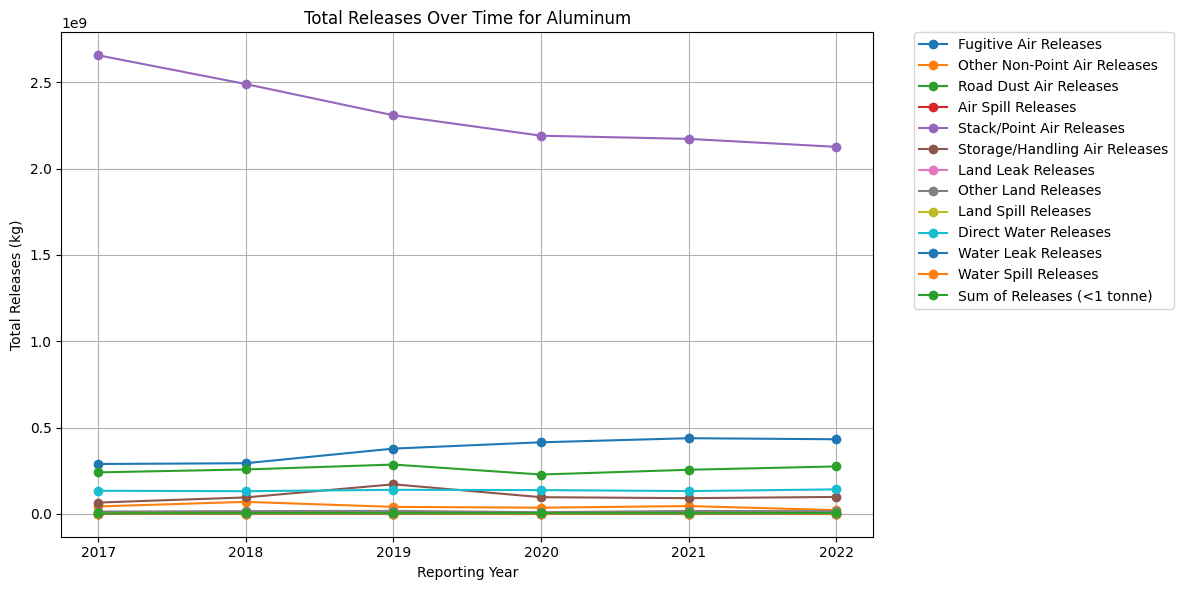


Analysis for Industry Sector: Cement, lime and other non-metallic minerals


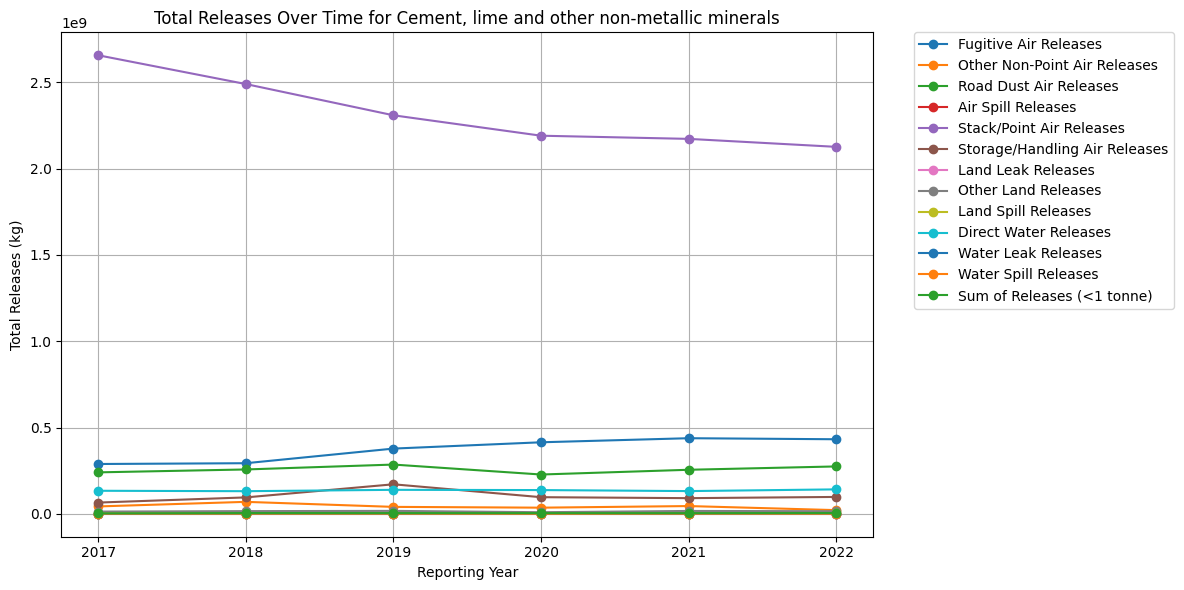


Analysis for Industry Sector: Chemicals


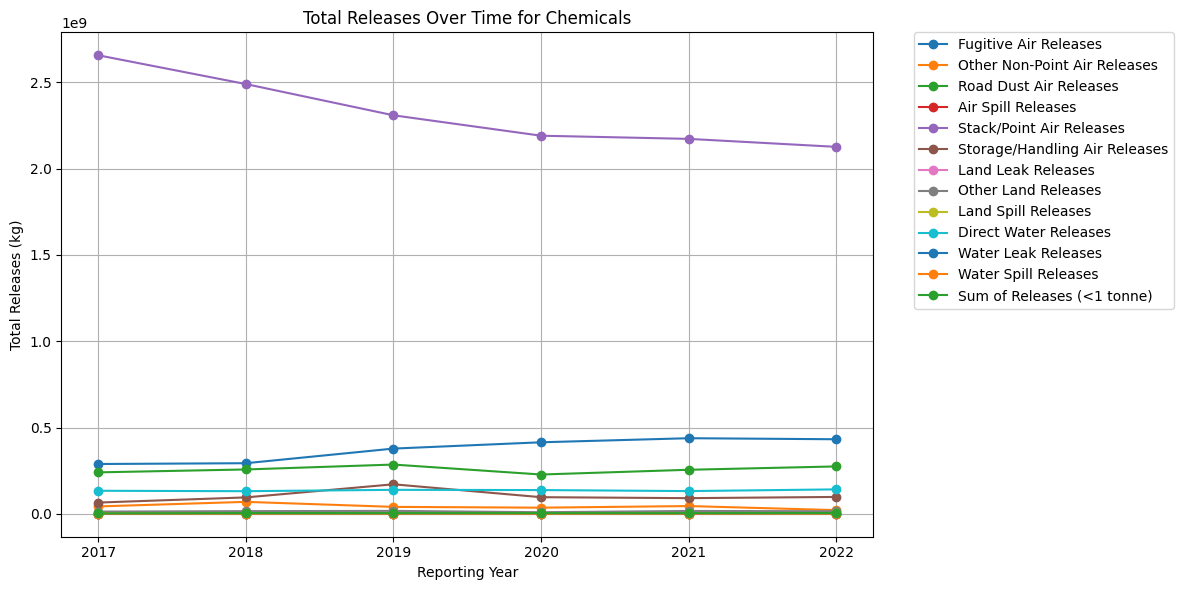


Analysis for Industry Sector: Electricity


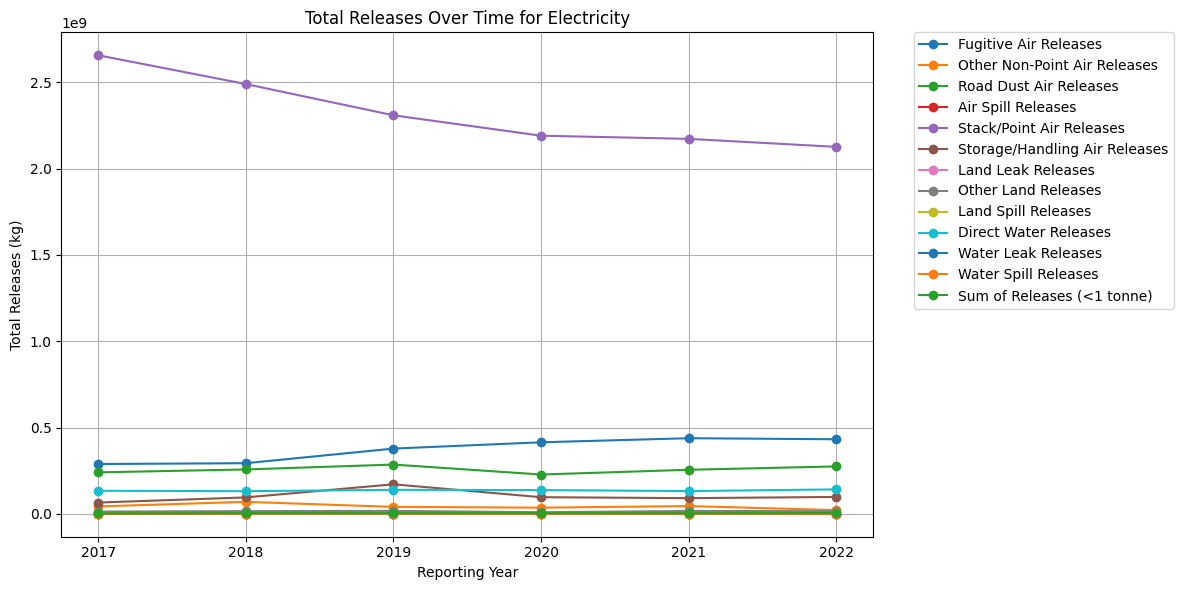


Analysis for Industry Sector: Iron and steel


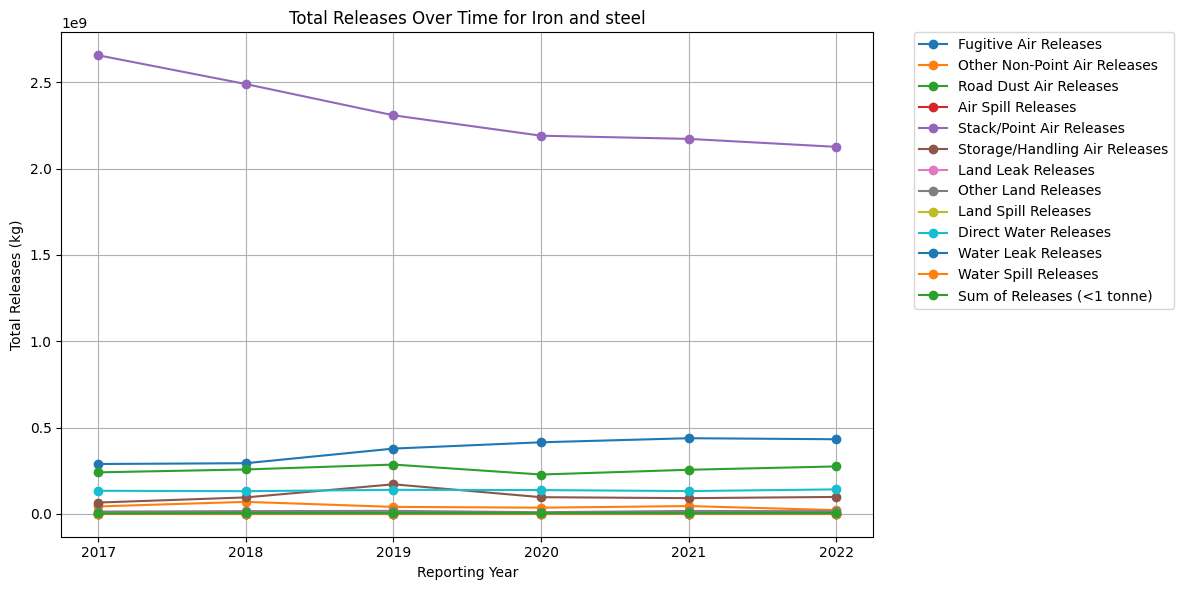


Analysis for Industry Sector: Metals (except aluminum, and iron and steel)


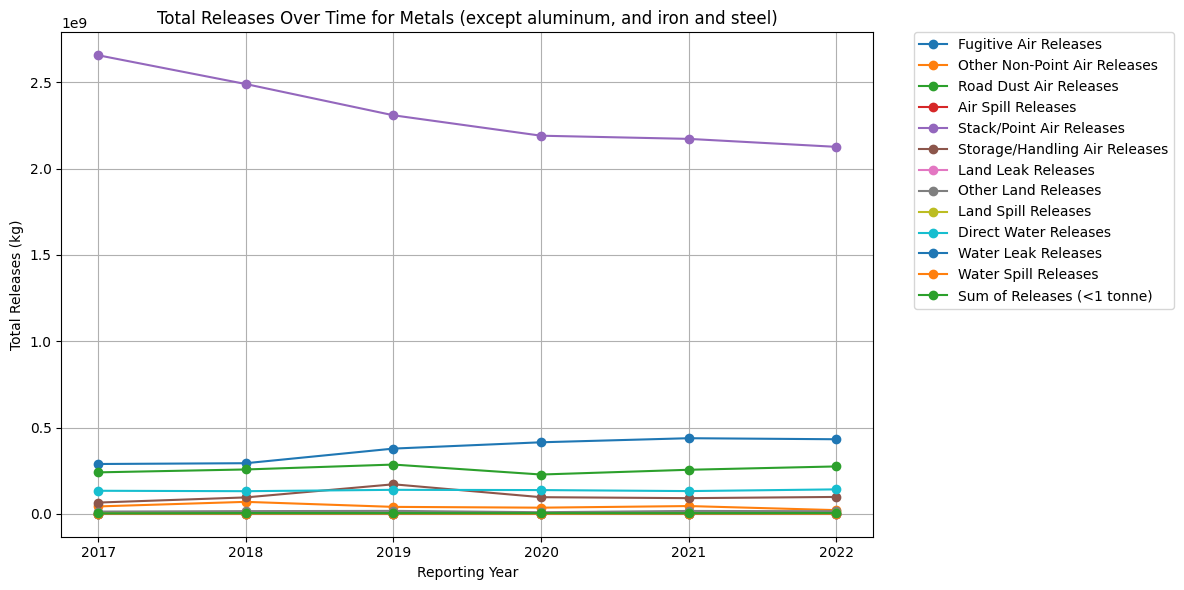


Analysis for Industry Sector: Mining and quarrying


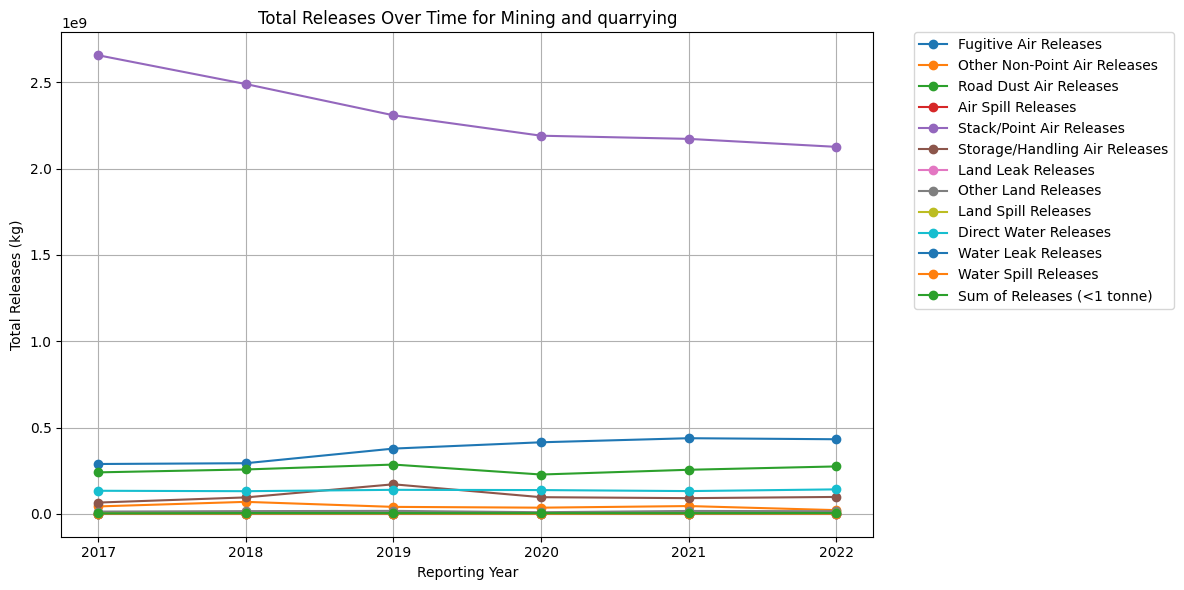


Analysis for Industry Sector: Oil and gas extraction (excluding oil sands)


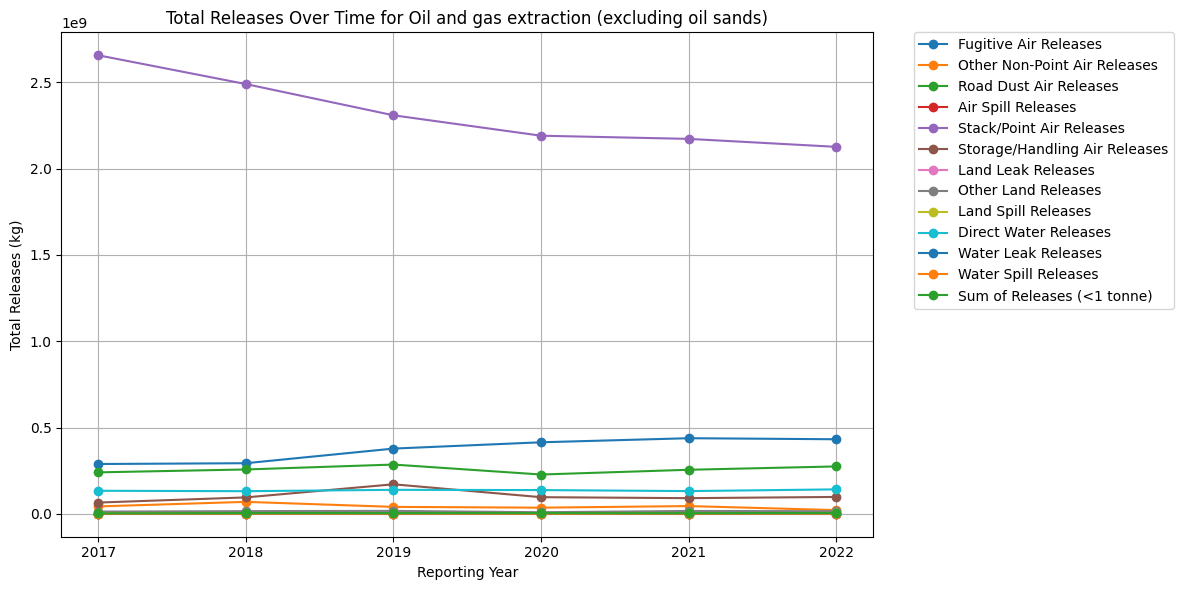


Analysis for Industry Sector: Oil and gas pipelines and storage


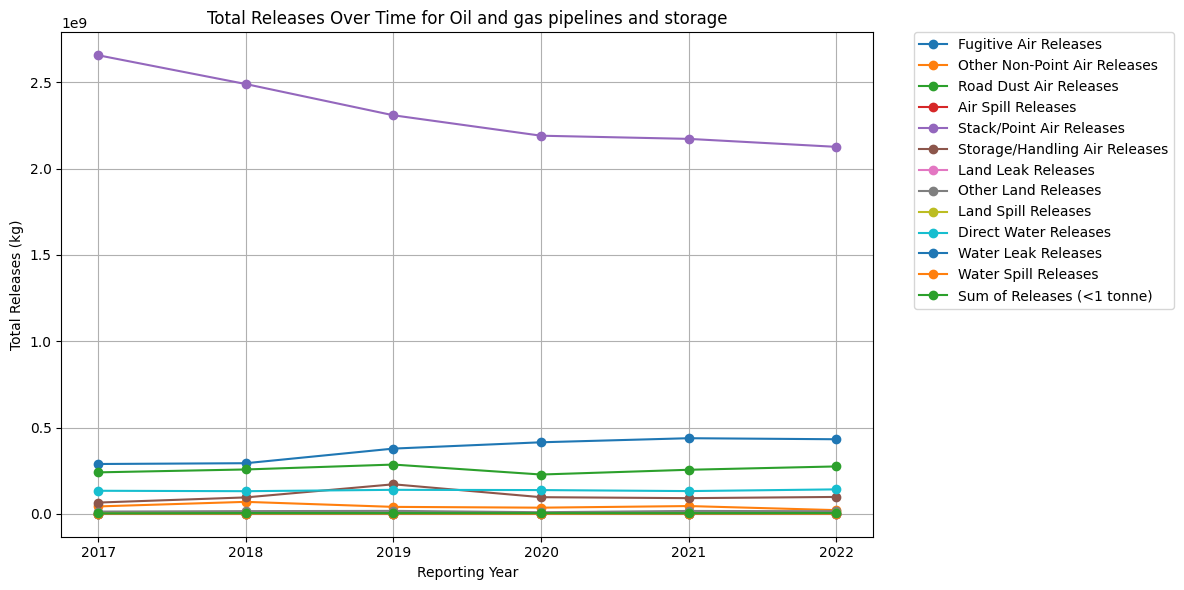


Analysis for Industry Sector: Oil sands


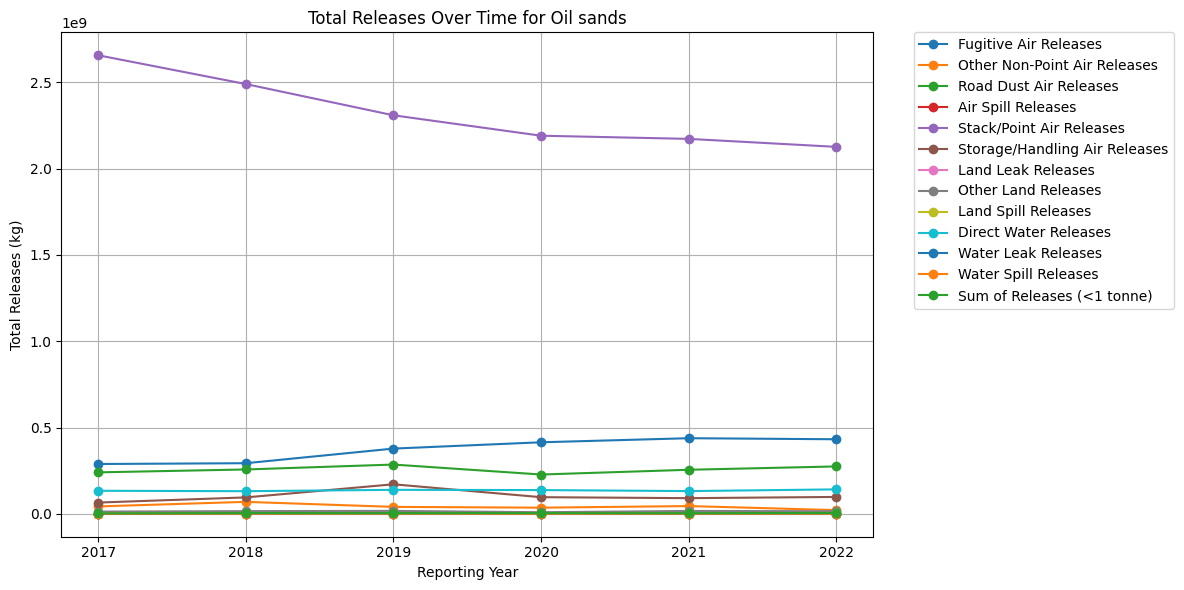


Analysis for Industry Sector: Other (except manufacturing)


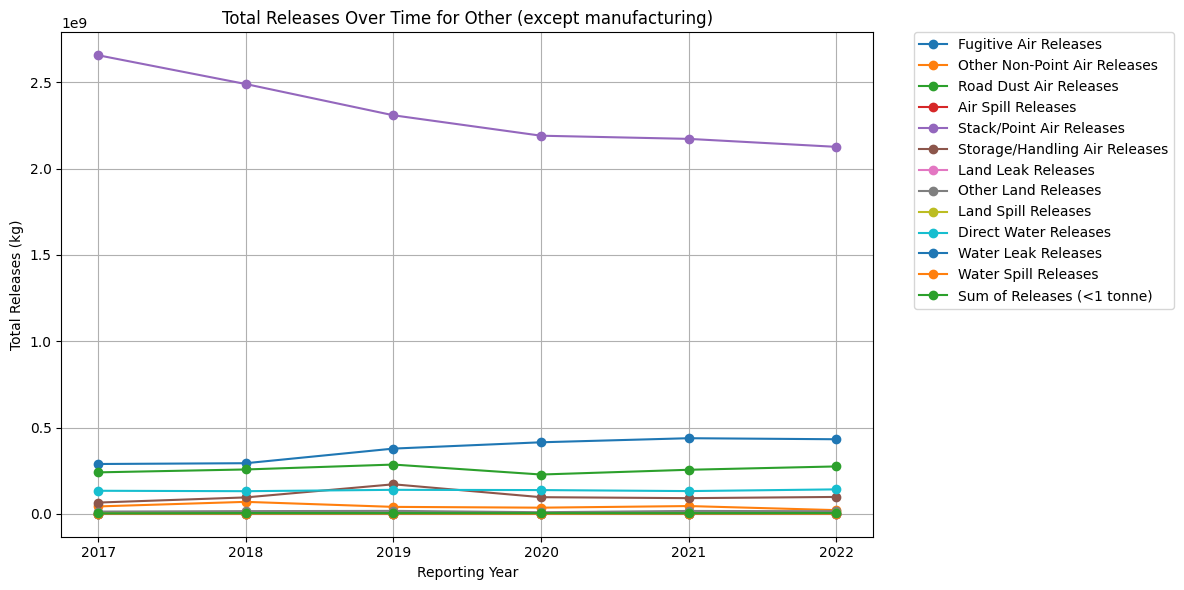


Analysis for Industry Sector: Other manufacturing


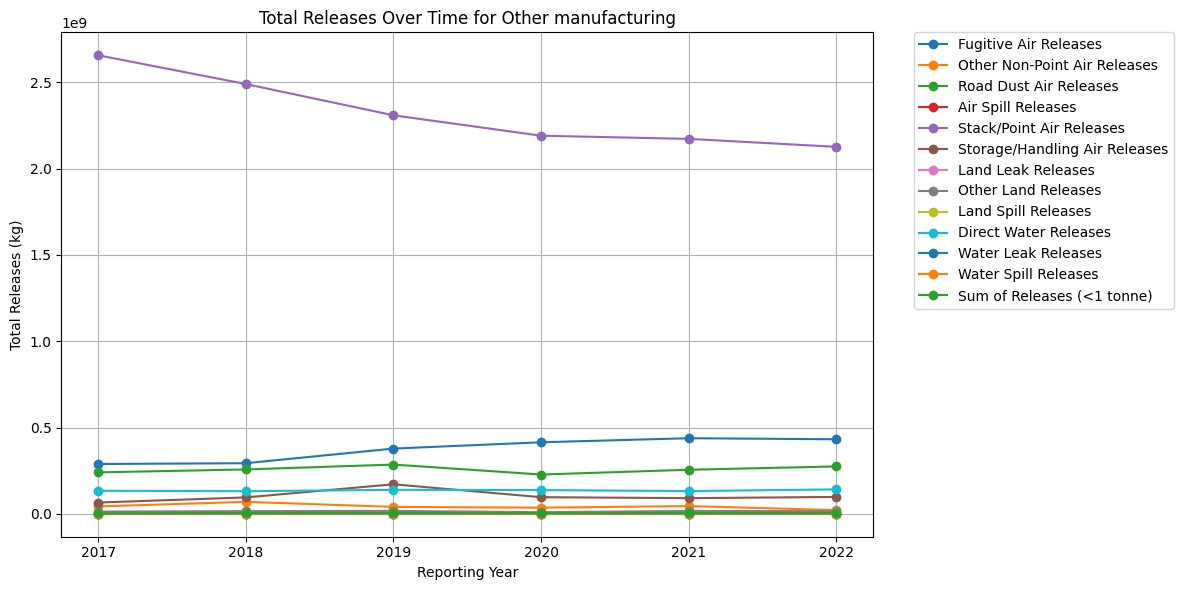


Analysis for Industry Sector: Petroleum and coal product refining and manufacturing


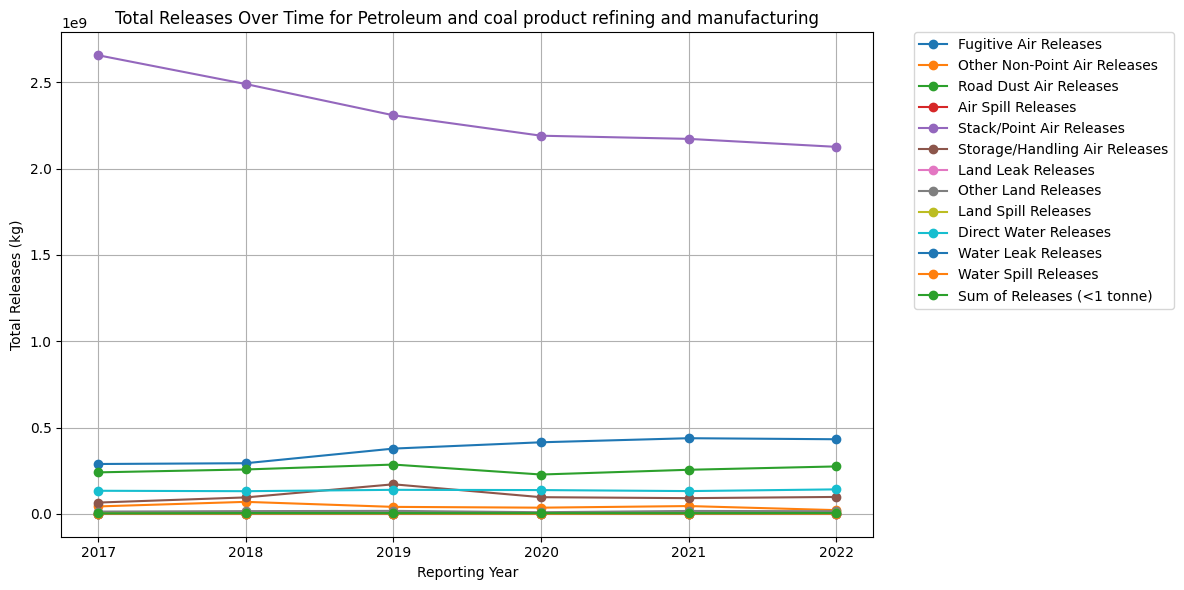


Analysis for Industry Sector: Plastics and rubber


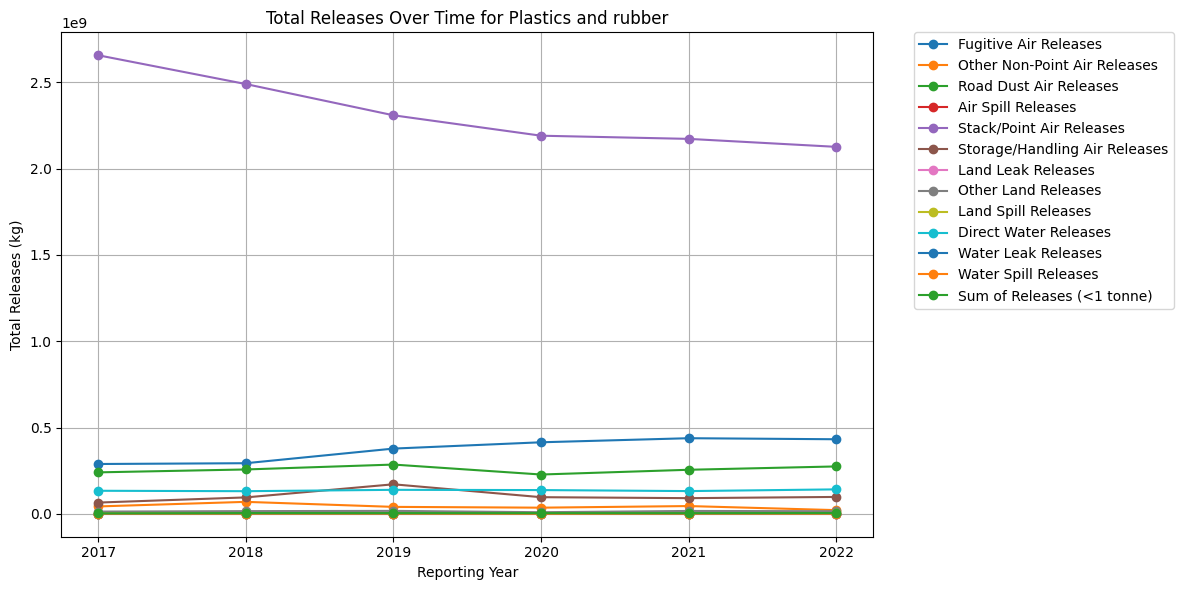


Analysis for Industry Sector: Pulp and paper


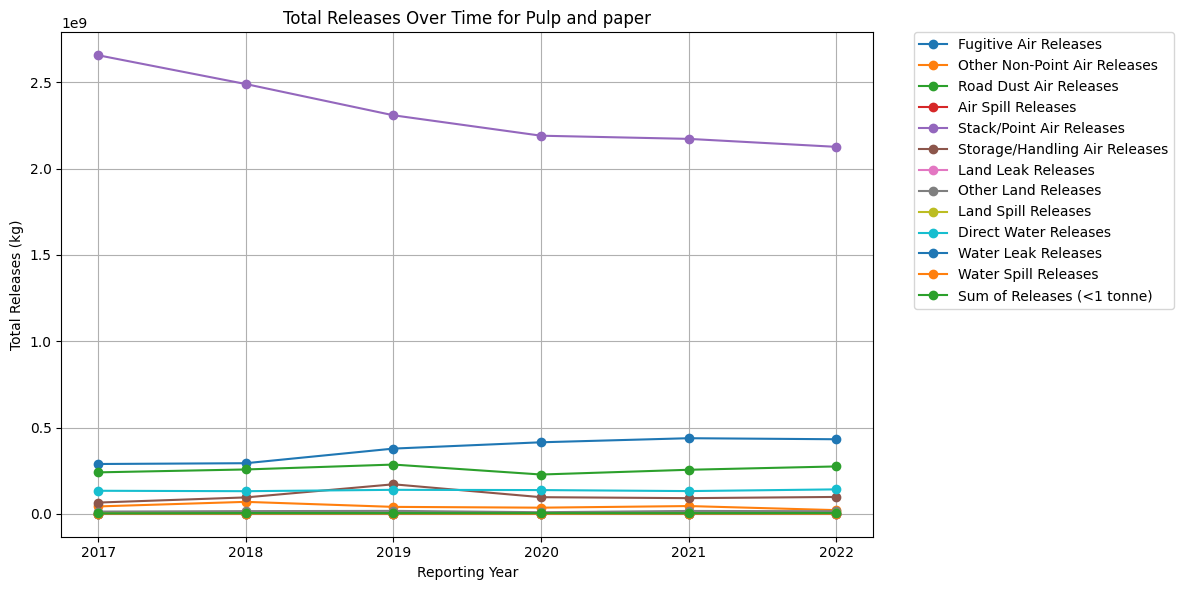


Analysis for Industry Sector: Transportation equipment manufacturing


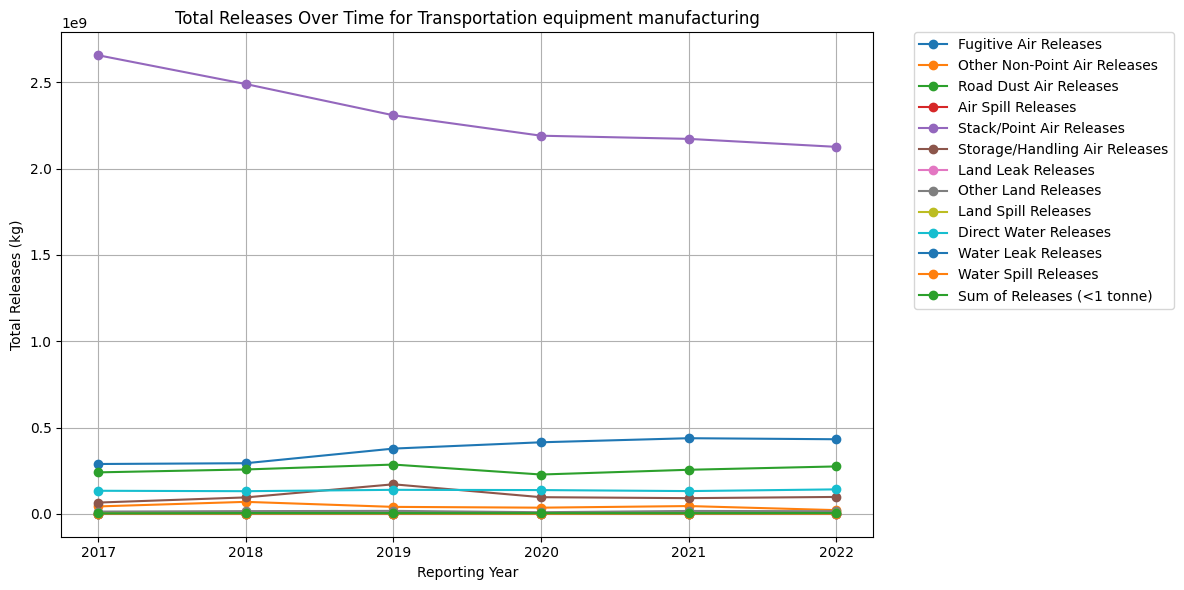


Analysis for Industry Sector: Waste treatment and disposal


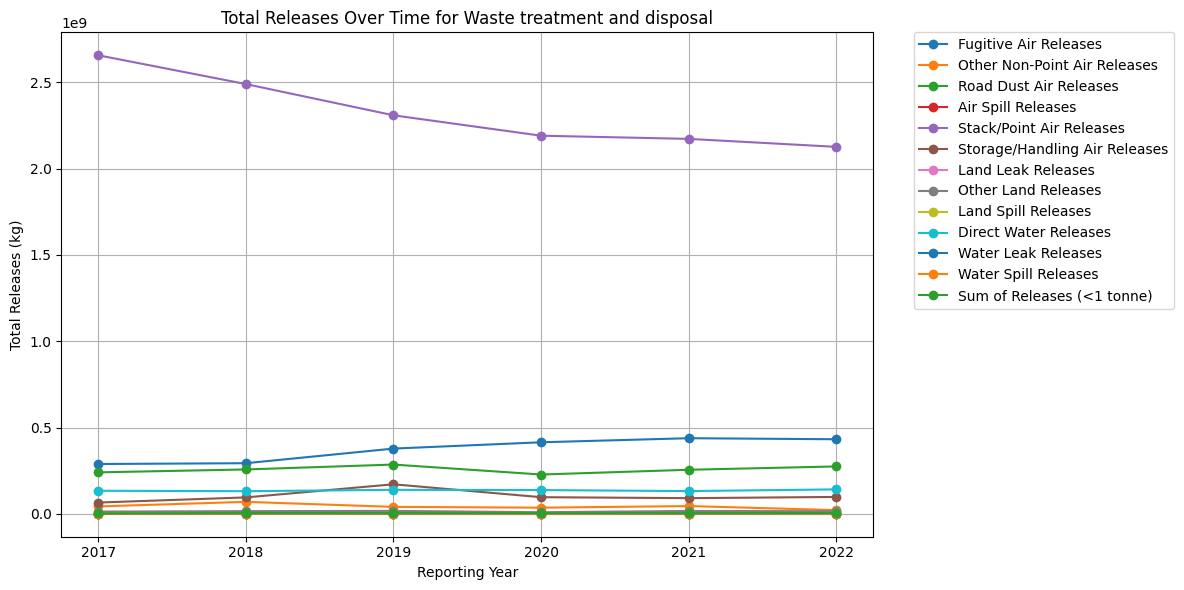


Analysis for Industry Sector: Water and wastewater systems


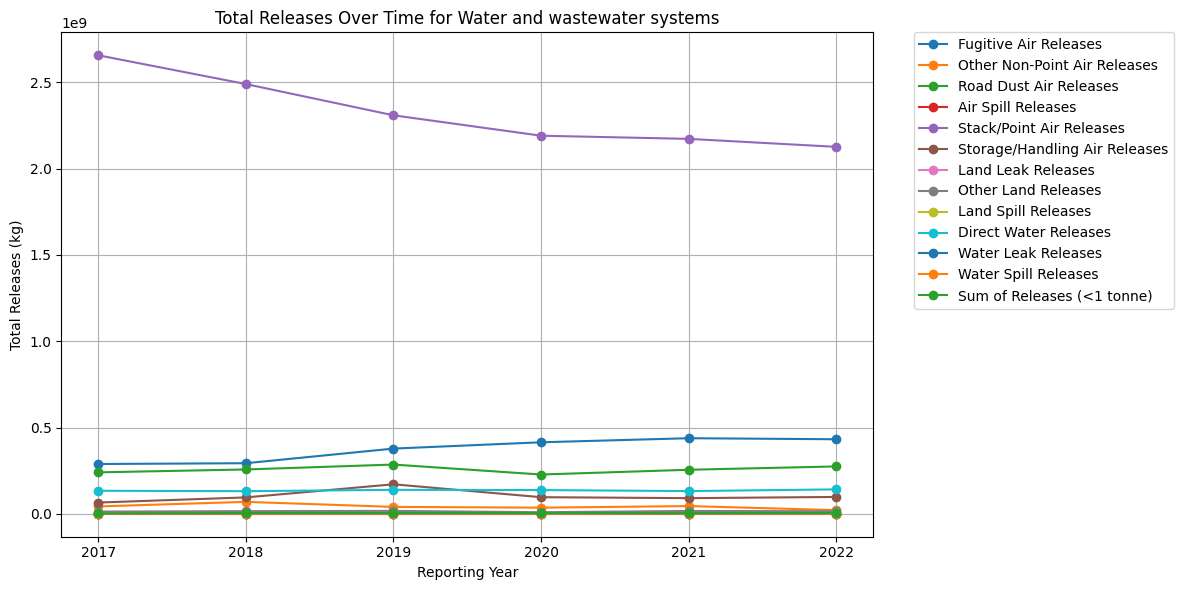


Analysis for Industry Sector: Wood products


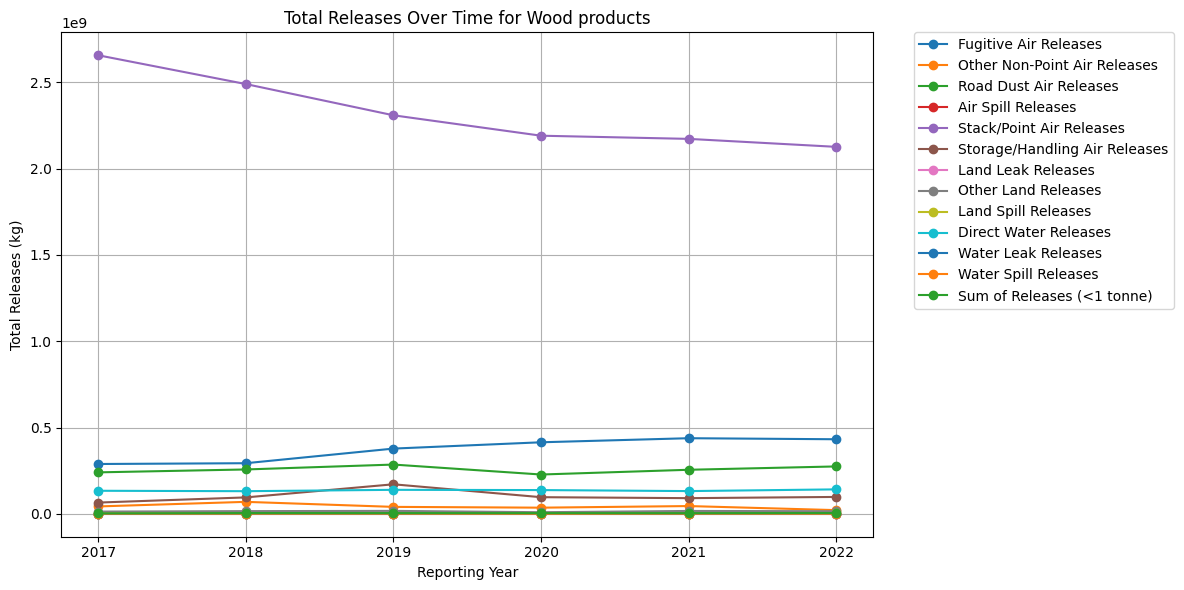

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Industry_Sector'
industry_groups = df_pivot_all.groupby('Industry_Sector')

# Iterate through the groups and create visualizations
for industry, group_df in industry_groups:
    print(f"\nAnalysis for Industry Sector: {industry}")

    # Calculate total releases for each year and release type
    total_releases_by_year_type = df_release_kg[
    (df_release_kg['Reporting_Year'] >= 2017) &
    (df_release_kg['Reporting_Year'] <= 2022)].groupby('Reporting_Year')[
        ['Release to Air - Fugitive (kg)',
         'Release to Air - Other Non-Point (kg)',
         'Release to Air - Road dust (kg)',
         'Release to Air - Spills (kg)',
         'Release to Air - Stack / Point (kg)',
         'Release to Air - Storage / Handling (kg)',
         'Releases to Land - Leaks (kg)',
         'Releases to Land - Other (kg)',
         'Releases to Land - Spills (kg)',
         'Releases to Water Bodies - Direct Discharges (kg)',
         'Releases to Water Bodies - Leaks (kg)',
         'Releases to Water Bodies - Spills (kg)',
         'Sum of release to all media (<1tonne) (kg)'  # Corrected column name
         ]].sum()

    # Create a subplot for the current industry
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed
    ax = plt.gca()

    # Plot each release type over time
    for release_type in total_releases_by_year_type.columns:
        total_releases_by_year_type[release_type].plot(ax=ax, marker='o', label=release_type)

    plt.title(f"Total Releases Over Time for {industry}")
    plt.xlabel("Reporting Year")
    plt.ylabel("Total Releases (kg)")

    # Place the legend outside the plot area
    plt.legend(
    [
        'Fugitive Air Releases',
        'Other Non-Point Air Releases',
        'Road Dust Air Releases',
        'Air Spill Releases',
        'Stack/Point Air Releases',
        'Storage/Handling Air Releases',
        'Land Leak Releases',
        'Other Land Releases',
        'Land Spill Releases',
        'Direct Water Releases',
        'Water Leak Releases',
        'Water Spill Releases',
        'Sum of Releases (<1 tonne)'
    ],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)  # Add a grid for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

Trying to set up thersholds for bining that will serve for our classification problem





In [ ]:
unique_substances = df_release_kg['Substance_Name'].unique()

# Sort them alphabetically
unique_substances_sorted = sorted(unique_substances)

# Print each unique substance on its own line
for substance in unique_substances_sorted:
    print(substance)


1,1,1,2-tetrachloroethane
1,1,2,2-tetrachloroethane
1,1,2-trichloroethane
1,1-methylenebis
1,2,4-trichlorobenzene
1,2,4-trimethylbenzene
1,2-butylene oxide
1,2-dichloroethane
1,2-dichloropropane
1,3-butadiene
1,4-benzenediamine, n,n -mixed phenyl and tolyl derivatives
1,4-dioxane
1-nitropyrene
2,2,4-trimethylhexamethylene diisocyanate
2,4-dichlorophenol
2,4-dinitrotoluene
2,6-di-t-butyl-4-methylphenol
2-butoxyethanol
2-ethanol
2-ethoxyethanol
2-ethoxyethyl acetate
2-mercaptobenzothiazole
2-methoxyethanol
2-propanone, reaction products with diphenylamine
3,3 -dichlorobenzidine dihydrochloride
3-methylcholanthrene
4-tert-octylphenol
5-methylchrysene
7,12-dimethylbenz[a]anthracene
7h-dibenzo[c,g]carbazole
acenaphthene
acenaphthylene
acetaldehyde
acetonitrile
acetophenone
acrolein
acrylamide
acrylic acid
acrylonitrile
alkanes, c10-13, chloro
allyl alcohol
aluminum
aluminum oxide
ammonia
aniline
anthracene
antimony
arsenic
asbestos
benz[a]anthracene
benzene
benzo[a]pyrene
benzo[b]fluoranthe

In [ ]:
# Calculate thresholds based on Total_All_Releases
low_threshold = df_release_kg['Total_All_Releases'].quantile(0.33)
middle_threshold = df_release_kg['Total_All_Releases'].quantile(0.66)
high_threshold = df_release_kg['Total_All_Releases'].max()  # or quantile(1.0)

print("Low threshold (33rd percentile):", low_threshold)
print("Middle threshold (66th percentile):", middle_threshold)
print("High threshold (Max value):", high_threshold)

Low threshold (33rd percentile): 614.0
Middle threshold (66th percentile): 11824.0
High threshold (Max value): 235907000.0


In [ ]:
df_pivot_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Industry_Sector  323 non-null    category
 1   Release_Type     323 non-null    object  
 2   2017             323 non-null    float64 
 3   2018             323 non-null    float64 
 4   2019             323 non-null    float64 
 5   2020             323 non-null    float64 
 6   2021             323 non-null    float64 
 7   2022             323 non-null    float64 
dtypes: category(1), float64(6), object(1)
memory usage: 18.8+ KB


### Creating Bining for classification problem

Why This Approach is Well-Suited for Our Problem
Data-Driven Classification:

The use of quantile-based binning with pd.qcut ensures that our bins (Decline, Stable, Growth) are derived directly from the data distribution. This is important because it avoids arbitrary threshold selection and ensures that each category represents a meaningful portion of the dataset.
Focus on Growth Trends:

By calculating a 5-year growth metric, we capture the dynamic aspect of pollutant releases. This is crucial for predicting future trends—whether an industry is likely to grow, remain stable, or decline in its release levels.

Actionable Categories:

The resulting categories (Decline, Stable, Growth) provide clear, interpretable targets for classification. Stakeholders can easily understand which industries are performing well and which may need intervention.

Foundation for Predictive Modeling:

With these bins in place, the next step is to develop a classification model that uses historical features (e.g., emission trends, industry characteristics) to predict the future growth category. This categorization simplifies the prediction task by converting a continuous problem into a discrete one.

In [ ]:
# Assume df_pivot_all is our pivoted DataFrame with columns for each year (e.g., Releases "2017" and Releases "2022")
# Calculate the 5-year growth metric for each industry
df_pivot_all['Growth_17_22'] = df_pivot_all[2022] - df_pivot_all[2017]

# Define labels for the bins. Here, for example:
labels = ['Decline', 'Stable', 'Growth']

# Use pd.qcut to create three quantile-based bins for the growth metric.
# Industries in the lowest 33% (most negative or lowest growth) will be labeled as 'Decline',
# the middle third as 'Stable', and the highest third as 'Growth'.
df_pivot_all['Growth_Category'] = pd.qcut(df_pivot_all['Growth_17_22'], q=3, labels=labels)

# Display the results (industry, growth value, and the assigned growth category)
print(df_pivot_all[['Industry_Sector', 'Growth_17_22', 'Growth_Category']].head(50))


                                 Industry_Sector  Growth_17_22 Growth_Category
0                                       Aluminum  3.968776e+05          Growth
1                                       Aluminum -8.231237e+04         Decline
2                                       Aluminum  0.000000e+00          Stable
3                                       Aluminum  6.743590e+05          Growth
4                                       Aluminum -7.373820e+07         Decline
5                                       Aluminum  2.195000e+03          Growth
6                                       Aluminum  0.000000e+00          Stable
7                                       Aluminum  0.000000e+00          Stable
8                                       Aluminum  0.000000e+00          Stable
9                                       Aluminum -1.030200e+01          Stable
10                                      Aluminum  0.000000e+00          Stable
11                                      Aluminum  0.

In [ ]:
df_pivot_all.head()

Industry_Sector                           Release_Type          2017          2018          2019          2020          2021          2022  Growth_17_22 Growth_Category
0        Aluminum         Release to Air - Fugitive (kg)  2.298527e+07  2.169851e+07  2.156382e+07  2.292812e+07  2.295173e+07  2.338215e+07  3.968776e+05          Growth
1        Aluminum  Release to Air - Other Non-Point (kg)  8.231240e+04  8.562500e+04  8.523900e+04  7.277100e+04  1.544272e+05  2.770000e-02 -8.231237e+04         Decline
2        Aluminum        Release to Air - Road dust (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          Stable
3        Aluminum           Release to Air - Spills (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  6.743590e+05  6.743590e+05          Growth
4        Aluminum    Release to Air - Stack / Point (kg)  4.980255e+08  4.406085e+08  4.165760e+08  4.484155e+08  4.389460e+08  4.242873e+08 -7.373820e+07         Decline

In [ ]:
# Drop Growth column
df_pivot_all.drop(columns=['Growth_17_22'], inplace=True)

In [ ]:
df_pivot_all.head()

Industry_Sector                           Release_Type          2017          2018          2019          2020          2021          2022 Growth_Category
0        Aluminum         Release to Air - Fugitive (kg)  2.298527e+07  2.169851e+07  2.156382e+07  2.292812e+07  2.295173e+07  2.338215e+07          Growth
1        Aluminum  Release to Air - Other Non-Point (kg)  8.231240e+04  8.562500e+04  8.523900e+04  7.277100e+04  1.544272e+05  2.770000e-02         Decline
2        Aluminum        Release to Air - Road dust (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          Stable
3        Aluminum           Release to Air - Spills (kg)  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  6.743590e+05          Growth
4        Aluminum    Release to Air - Stack / Point (kg)  4.980255e+08  4.406085e+08  4.165760e+08  4.484155e+08  4.389460e+08  4.242873e+08         Decline

**Seperating the DataFrame into Smaller DataFrames**

* Grouping: The data is grouped by the 'Reporting_Year' and 'Substance_Name' using the groupby function in pandas. This prepares the data to be split into smaller subsets.

* Iteration: This loops through each group, representation a unique combination of year and sector.

* DataFrame Creation: Inside the loop a new DataFrame is created for the current group which includes the year and sector.

* Storing: New DataFrames are stored using global()[table_name], to be used further in next step.

In [ ]:
# Group data by 'Reporting_Year' and 'Substance_Name'
grouped = df_release.groupby(['Reporting_Year', 'Substance_Name'])

# Iterate through the groups and create separate DataFrames
for (year, substance), group_df in grouped:
    # Create a variable name for the new DataFrame
    table_name = f"df_{year}_{substance.replace(' ', '_')}"

    # Assign the group DataFrame to the variable
    globals()[table_name] = group_df

    # Print a message indicating the creation of the table
    print(f"DataFrame '{table_name}' created for year {year} and substance {substance}")


DataFrame 'df_2000_1,1,2,2-tetrachloroethane' created for year 2000 and substance 1,1,2,2-tetrachloroethane
DataFrame 'df_2000_1,1,2-trichloroethane' created for year 2000 and substance 1,1,2-trichloroethane
DataFrame 'df_2000_1,1-methylenebis' created for year 2000 and substance 1,1-methylenebis
DataFrame 'df_2000_1,2,4-trimethylbenzene' created for year 2000 and substance 1,2,4-trimethylbenzene
DataFrame 'df_2000_1,2-butylene_oxide' created for year 2000 and substance 1,2-butylene oxide
DataFrame 'df_2000_1,2-dichloroethane' created for year 2000 and substance 1,2-dichloroethane
DataFrame 'df_2000_1,3-butadiene' created for year 2000 and substance 1,3-butadiene
DataFrame 'df_2000_1,4-dioxane' created for year 2000 and substance 1,4-dioxane
DataFrame 'df_2000_2,4-dichlorophenol' created for year 2000 and substance 2,4-dichlorophenol
DataFrame 'df_2000_2,4-dinitrotoluene' created for year 2000 and substance 2,4-dinitrotoluene
DataFrame 'df_2000_2,6-di-t-butyl-4-methylphenol' created fo

## **Splitting the Data for ML classification**


In [ ]:
df_pivot_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Industry_Sector  323 non-null    category
 1   Release_Type     323 non-null    object  
 2   2017             323 non-null    float64 
 3   2018             323 non-null    float64 
 4   2019             323 non-null    float64 
 5   2020             323 non-null    float64 
 6   2021             323 non-null    float64 
 7   2022             323 non-null    float64 
 8   Growth_Category  323 non-null    category
dtypes: category(2), float64(6), object(1)
memory usage: 19.2+ KB


In [ ]:
df_pivot_all.shape

(323, 9)

Explanation for the code below:

Feature/Target Separation:
We create X (all columns except "Growth_Category") and y (the target).

First Split (Training+Validation vs. Testing):
We use train_test_split to allocate 20% of the data to the test set while stratifying by Growth_Category so that class distributions remain similar across splits.

Second Split (Training vs. Validation):
From the remaining 80% of the data (in X_train_val and y_train_val), we allocate 25% as the validation set. This results in roughly 60% training, 20% validation, and 20% testing.

Random State & Stratification:
The random_state=42 parameter ensures reproducibility, and stratification maintains similar class proportions in each subset.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_pivot_all.drop(columns=['Growth_Category'])
y = df_pivot_all['Growth_Category']

# First, split off the test set (20% of the data)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Next, split the remaining 80% into training and validation sets.
# Using test_size=0.25 here yields 25% of 80% = 20% of the original data as validation.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,
    random_state=42,
    stratify=y_train_val
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (193, 8)
Validation set shape: (65, 8)
Test set shape: (65, 8)


## **Feature Encoding and Normalization for ML classification**

Now that we have split our dataset, let's move on to feature encoding and normalization.

-  We'll apply one-hot encoding to the "Industry Sector" field and use Min-Max scaling to normalize all numeric features.
- Min-Max scaling is particularly effective when feature value ranges vary widely, ensuring that all features contribute equally to our model.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd

def preprocess_data(X_train, X_val, X_test):
    # Convert all column names to strings for consistency
    X_train.columns = X_train.columns.astype(str)
    X_val.columns = X_val.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)

    # Specify the columns to encode and scale
    categorical_cols = ['Industry_Sector', 'Release_Type']
    numeric_cols = ['2017', '2018', '2019', '2020', '2021', '2022']

    # Define the column transformer with updated parameter for one-hot encoding
    ct = ColumnTransformer(
        transformers=[
            ("onehot", OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
            ("scaler", MinMaxScaler(), numeric_cols)
        ],
        remainder="passthrough"  # Pass through any other columns (if applicable)
    )

    # Fit the transformer on the training data and transform all sets
    X_train_trans = pd.DataFrame(ct.fit_transform(X_train), columns=ct.get_feature_names_out())
    X_val_trans = pd.DataFrame(ct.transform(X_val), columns=ct.get_feature_names_out())
    X_test_trans = pd.DataFrame(ct.transform(X_test), columns=ct.get_feature_names_out())

    return X_train_trans, X_val_trans, X_test_trans

# Example usage:
X_train_trans, X_val_trans, X_test_trans = preprocess_data(X_train, X_val, X_test)



Are our classes balanced? Let's see.

In [ ]:
# To see the raw counts:
print(df_pivot_all['Growth_Category'].value_counts())

# To see the relative proportions (as percentages):
print(df_pivot_all['Growth_Category'].value_counts(normalize=True) * 100)


Growth_Category
Decline    108
Stable     108
Growth     107
Name: count, dtype: int64
Growth_Category
Decline    33.436533
Stable     33.436533
Growth     33.126935
Name: proportion, dtype: float64


Based on the output, our classes are very balanced. Each class ("Decline", "Stable", and "Growth") makes up roughly 33% of the data (with counts of 108, 108, and 107, respectively). This means that there is no major class imbalance, and you likely do not need to apply balancing techniques.

## **Part 2: ML Model Development**

We will build two machine learning models for our classification problem—one using k-Nearest Neighbors (kNN) and one using a Decision Tree.

These models will predict our growth categories (Decline, Stable, Growth) based on historical NPRI data. After training, we'll compare their performance to determine which model best distinguishes between the different growth trends.

In [ ]:
# 1. Import the necessary classes
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 2. Instantiate the models
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()

# 3. Fit the models using the transformed training data
dt_model.fit(X_train_trans, y_train)
knn_model.fit(X_train_trans, y_train)

# 4. Predict on the transformed test set
y_pred_dt = dt_model.predict(X_test_trans)
y_pred_knn = knn_model.predict(X_test_trans)

# 5. Evaluate performance (example with accuracy score)
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_dt))
print("k-NN accuracy:", accuracy_score(y_test, y_pred_knn))



Decision Tree accuracy: 0.8307692307692308
k-NN accuracy: 0.676923076923077


## **Part 3: ML Model Evaluation**

We will evaluate our initial two models.

### **kNN ML Model**


=== k-NN Confusion Matrix ===
[[12  8  2]
 [ 8 11  2]
 [ 0  1 21]]


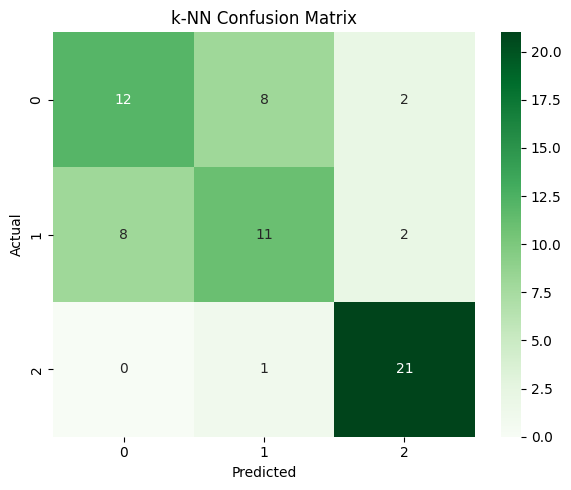

=== k-NN Classification Report ===
              precision    recall  f1-score   support

     Decline       0.60      0.55      0.57        22
      Growth       0.55      0.52      0.54        21
      Stable       0.84      0.95      0.89        22

    accuracy                           0.68        65
   macro avg       0.66      0.67      0.67        65
weighted avg       0.67      0.68      0.67        65



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Compute the confusion matrix for k-NN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# 2. Print the confusion matrix (numeric form)
print("\n=== k-NN Confusion Matrix ===")
print(cm_knn)

# 3. Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title('k-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 4. Print the classification report for k-NN
print("=== k-NN Classification Report ===")
print(classification_report(y_test, y_pred_knn))


### **Decision Tree ML Model**


=== Decision Tree Confusion Matrix ===
[[16  6  0]
 [ 5 16  0]
 [ 0  0 22]]


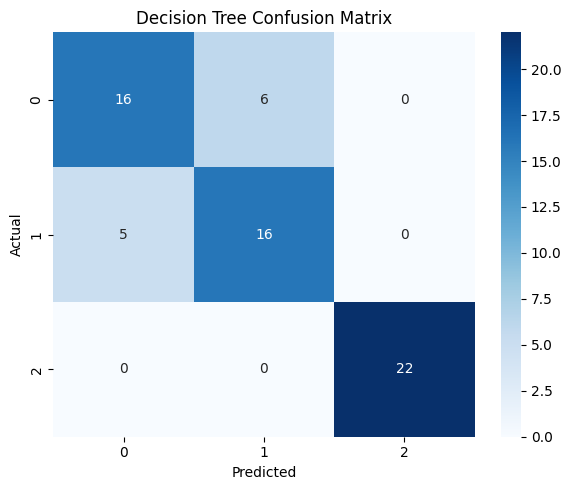

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

     Decline       0.76      0.73      0.74        22
      Growth       0.73      0.76      0.74        21
      Stable       1.00      1.00      1.00        22

    accuracy                           0.83        65
   macro avg       0.83      0.83      0.83        65
weighted avg       0.83      0.83      0.83        65



In [ ]:
# Compute the confusion matrix for the Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Print the confusion matrix in numeric form
print("\n=== Decision Tree Confusion Matrix ===")
print(cm_dt)

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Print the classification report for the Decision Tree model
print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred_dt))


## **Part 4: Cross Validation**

we’ll perform cross-validation on our models to gauge their performance and ensure they generalize effectively to unseen data. This approach offers a more robust estimate of each model’s accuracy and helps detect any overfitting issues.

In [ ]:
from sklearn.model_selection import cross_val_score

# Example: cross-validation for kNN
knn_cv_scores = cross_val_score(knn_model, X_val_trans, y_val, cv=3)
knn_cv_mean = np.mean(knn_cv_scores)  # Average CV score
print("Mean CV Score for kNN:", knn_cv_mean)

# Example: cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X_val_trans, y_val, cv=3)
dt_cv_mean = np.mean(dt_cv_scores)
print("Mean CV Score for Decision Tree:", dt_cv_mean)


Mean CV Score for kNN: 0.6284271284271284
Mean CV Score for Decision Tree: 0.7380952380952381


The kNN model achieved a mean CV score of approximately 62.84%, while the Decision Tree model achieved approximately 73.81%.

This indicates that, based on cross-validation, the Decision Tree is currently more effective at correctly predicting the growth categories (Decline, Stable, Growth) in the NPRI dataset compared to the kNN model.

The higher score for the Decision Tree suggests it may generalize better to unseen data, although further tuning and evaluation on a separate test set are recommended to confirm these findings.

## **Part 5: Model Selection**

Based on the cross-validation results and the nature of our data, I would select the Decision Tree model. Here’s why:

Higher Mean CV Score:
The Decision Tree achieved a mean CV score of approximately 73.81%, compared to 62.84% for kNN. This indicates that the Decision Tree is more accurate in distinguishing between the growth categories (Decline, Stable, Growth).

Handling Feature Interactions:
Decision Trees can capture non-linear relationships and complex interactions among features without the need for extensive feature engineering. Given that our dataset includes multiple encoded and normalized features (including categorical variables like Industry_Sector), a Decision Tree can naturally split the data based on these characteristics.

Interpretability:
Decision Trees provide a clear and interpretable structure that can be visualized. This is valuable for understanding which factors are most influential in predicting growth trends, which is important in a domain like NPRI data analysis.

Flexibility for Tuning:
Although the basic Decision Tree already outperforms kNN here, Decision Trees can be further enhanced through techniques like pruning, ensemble methods (e.g., Random Forests), or boosting. This offers additional avenues for improvement if needed.

Overall, the Decision Tree's superior accuracy, ability to handle complex feature interactions, and interpretability make it the most suitable choice for predicting growth categories in our NPRI dataset.

## **Part 6: hyperparameter Tuning**

We'll enhance our Decision Tree model by performing a randomized grid search for hyperparameter tuning. This approach will help us identify the optimal parameter settings to further improve the model's performance.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

     Decline       0.80      0.73      0.76        22
      Growth       0.74      0.81      0.77        21
      Stable       1.00      1.00      1.00        22

    accuracy                           0.85        65
   macro avg       0.85      0.85      0.84        65
weighted avg       0.85      0.85      0.85        65



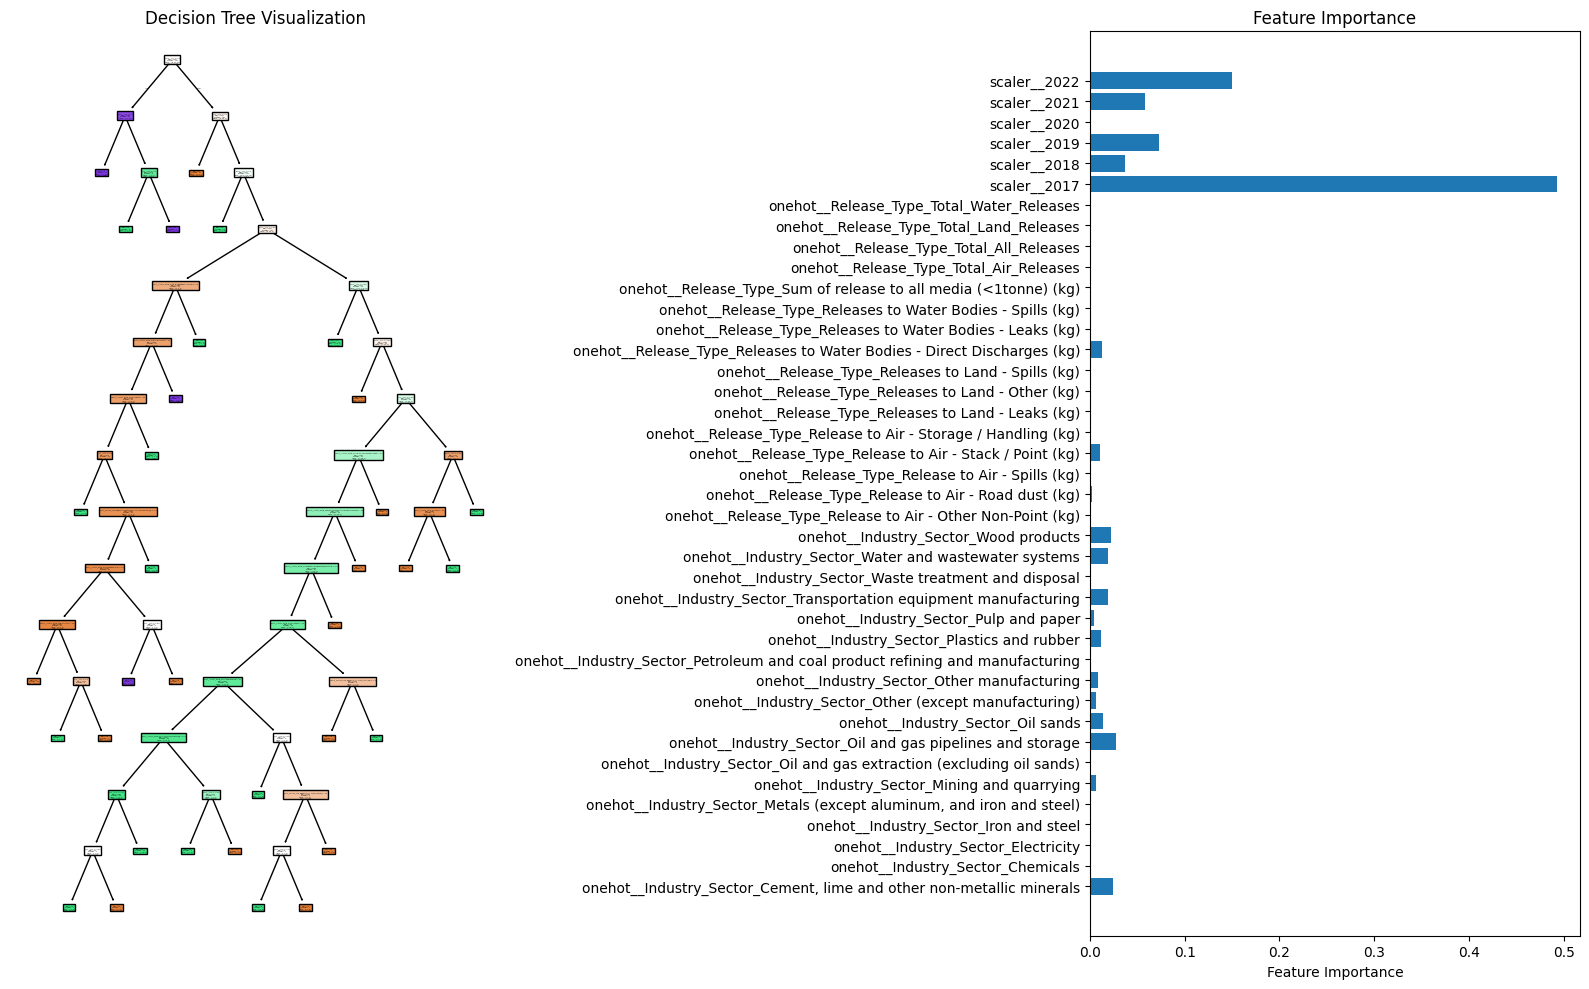

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter distributions for the Decision Tree
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier()

# Set up the Randomized Search with 5-fold cross-validation
rs = RandomizedSearchCV(estimator=dt_model,
                        param_distributions=param_dist,
                        scoring='accuracy',
                        n_iter=20,
                        cv=5,
                        n_jobs=-1,
                        verbose=1,
                        random_state=42)

# Fit the randomized search on the training data (using our preprocessed data)
rs.fit(X_train_trans, y_train)

# Retrieve the best Decision Tree model from the randomized search
dtc = rs.best_estimator_

# Predict on the test set using the best model
y_pred = dtc.predict(X_test_trans)

# Print the classification report to evaluate performance
print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree and its feature importances
plt.figure(figsize=(16, 10))

# Decision Tree Visualization
plt.subplot(1, 2, 1)
# For class_names, we use the unique classes from y_train (sorted for clarity)
class_names = sorted(np.unique(y_train))
plot_tree(dtc, filled=True, feature_names=X_train_trans.columns, class_names=class_names)
plt.title("Decision Tree Visualization")

# Feature Importance Plot
plt.subplot(1, 2, 2)
plt.barh(X_train_trans.columns, dtc.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


### Summary of the Decision Tree Results

- **Randomized Search CV:**  
  - The output `Fitting 5 folds for each of 20 candidates, totalling 100 fits` indicates that the model underwent 20 randomized hyperparameter combinations, each evaluated with 5-fold cross-validation.

- **Model Performance (Classification Report):**  
  - Overall **accuracy** is **85%** across 65 samples.  
  - **Stable** class achieves a perfect score (precision, recall, and F1 of 1.0), suggesting these samples are very distinct in the data.  
  - **Decline** and **Growth** classes also perform reasonably well, with F1-scores around 0.76–0.77.

- **Decision Tree Visualization:**  
  - The tree splits primarily on numeric year columns (e.g., `scaler__2017`, `scaler__2022`), indicating that release values from specific years drive most decisions.

- **Feature Importance:**  
  - Year-based numeric features dominate, while one-hot-encoded columns for **Industry_Sector** and **Release_Type** show minimal impact in this model.

**Key Takeaways:**
1. The **numeric release data** strongly influences whether an industry is classified as **Decline, Stable, or Growth**.  
2. The perfect classification of **Stable** suggests a clear boundary for stable release patterns.  
3. The **85% accuracy** and relatively balanced performance across classes indicate that the tuned Decision Tree generalizes reasonably well.  



### Comparison of Decision Tree Performance: Before vs. After Hyperparameter Tuning

| **Metric**      | **Before Tuning** | **After Tuning** |
|-----------------|-------------------|------------------|
| **Decline (F1)** | 0.74              | 0.76             |
| **Growth (F1)**  | 0.74              | 0.77             |
| **Stable (F1)**  | 1.00              | 1.00             |
| **Accuracy**    | 0.83              | 0.85             |

1. **Overall Accuracy**  
   - The accuracy improved from **83%** to **85%**. While the increase is modest, it indicates that the tuned model generalizes slightly better.

2. **Class-Specific Performance**  
   - **Decline:** F1-score increased from 0.74 to 0.76.  
   - **Growth:** F1-score increased from 0.74 to 0.77.  
   - **Stable:** Remains perfectly classified at 1.00.

3. **Conclusion**  
   - **Hyperparameter Tuning Provided a Boost:** The slight increases in F1-scores for Decline and Growth, along with the rise in overall accuracy, suggest the randomized grid search successfully refined the model.  
   - **Stable Class Remains Easiest to Predict:** Both before and after tuning, the “Stable” class consistently achieves a perfect F1-score, indicating its samples are likely more homogeneous or distinct in the data.  
   - **Next Steps:** Although the improvement is modest, it demonstrates the value of tuning. Additional steps—such as further feature engineering, pruning, or trying ensemble methods—may yield further gains.
